# Introduction

This notebook contains the various Strategies to fraud defaulters. The problem statement is the part of the Strategy Track - American Express Campus Challenge 2024.

The details of problem statement and data can be in Problem Statement section.

This notebook involves and extensive use of Exploratory Data Analysis Techniques.

# Problem Statement
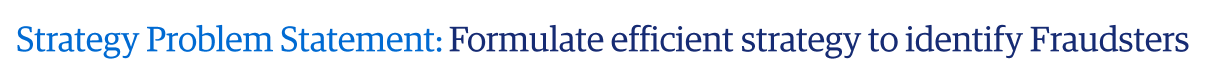
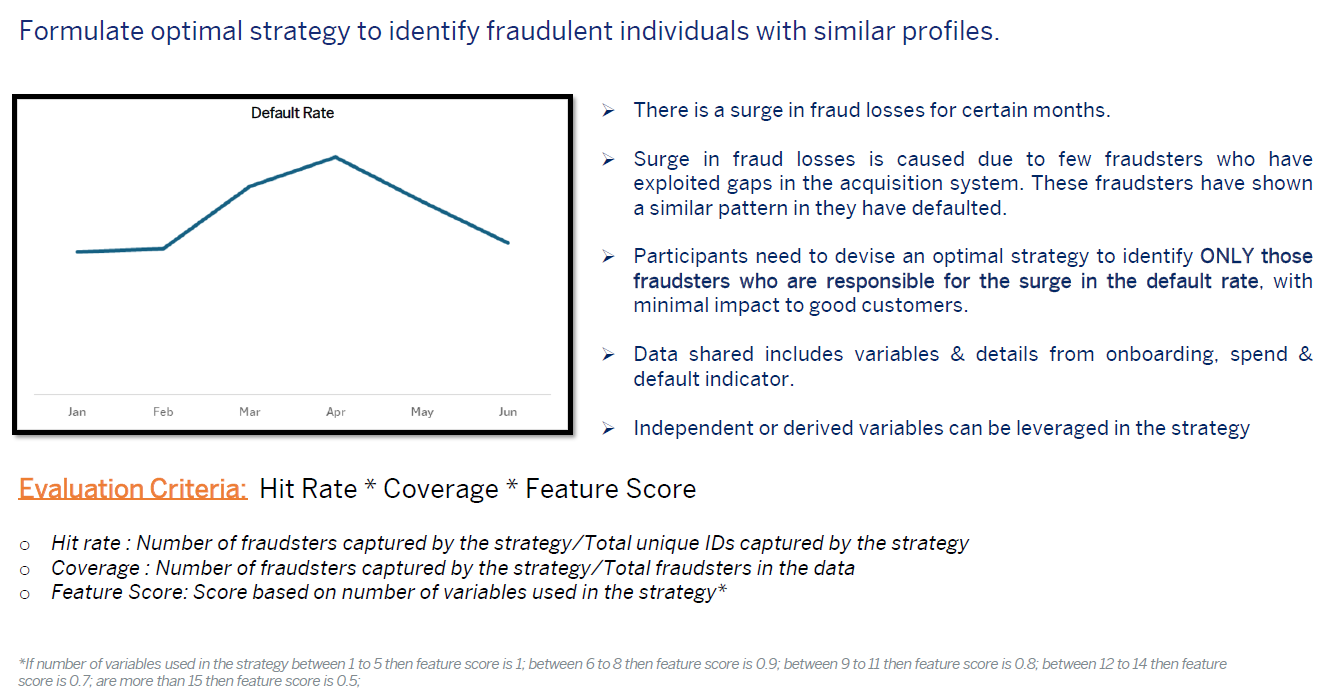

Our strategy was able to get a score of 92 on the above defined evaluation criteria, ranking in top 15 out of 600+ participating teams.

Let's dive deep into the data and understand what we need to do exactly?

# Data and Description

> Importing dataset

In [1]:
# importing useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
#some display setting to view full data
pd.set_option('display.max_columns', 70)
pd.set_option('display.max_rows', 70)

In [2]:
file_path = '/kaggle/input/american-express-campus-challenge-strategy/66acd42635424_r3_data.xlsx'

In [3]:
#since the file is password protected
!pip install --user msoffcrypto-tool

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 kB 2.6 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
#since the file is password protected
import msoffcrypto
import io
passwd = 'MERCHANT'

decrypted_workbook = io.BytesIO()
with open(file_path, 'rb') as file:
    office_file = msoffcrypto.OfficeFile(file)
    office_file.load_key(password=passwd)
    office_file.decrypt(decrypted_workbook)

df = pd.read_excel(decrypted_workbook, sheet_name='Data')

In [5]:
df.head()

,unique_identifier,appl_month,prod_name,acq_channel,state_code,bureau_src,risk_score_1,bureau_score,limit,income,...,merchant2_cat,merchant3,merchant3_amt,merchant3_ten,merchant3_cat,risk_score_8,risk_score_9,risk_score_10,risk_score_11,default_ind
0,116356,Feb,Product 7,Channel 4,CA,No Bureau Hit,0.0,800,5000,45000,...,0,0,0.0,0,0,0.000,0.0000,0.012,0.2787,0
1,110872,Feb,Product 6,Channel 3,GA,Bureau 1,0.1,775,13000,100000,...,0,0,0.0,0,0,0.999,0.0092,0.070,0.2275,0
2,158686,Jun,Product 6,Channel 1,CA,Bureau 1,5.6,900,2000,100000,...,0,0,0.0,0,0,0.002,0.0015,0.035,0.2787,1
3,148772,May,Product 5,Channel 3,DC,No Bureau Hit,0.0,800,5000,170000,...,1,0,0.0,0,0,0.252,0.0253,0.131,0.1175,0
4,158473,Jun,Product 7,Channel 2,VA,Bureau 1,0.1,775,10000,40000,...,0,0,0.0,0,0,0.000,0.0000,0.000,0.2035,0


Let's look at the columns description to understand what each column represents.

In [10]:
clm_desc = pd.read_excel(decrypted_workbook, sheet_name='Glossary')
clm_desc

,#,Variable,Description
0,1,unique_identifier,Unique Identifier
1,2,appl_month,Application Month
2,3,prod_name,Product Name
3,4,acq_channel,Acquisition Channel
4,5,state_code,State Code
5,6,bureau_src,Bureau Source
6,7,risk_score_1,Risk score assigned based on profitability
7,8,bureau_score,Bureau score
8,9,limit,Assigned credit limit
9,10,income,Income of applicant


Looks like we have lot to deal with:)
Let's start with understanding the PS well.

**The last column - "default_ind" represent whether a person was able to repay a loan (represented by '0' - non defaulters) he/she took or not (represented by '1' - defaulters). There is an increase (as we will see below) in the number of defaulters (those who didn't pay back the loan) in certain months. We need to predict who are these people (frauders) because of which default rate is increasing.**

Note: Every defaulter is not a frauders but vice-versa is True. Meaning frauders are subset of defaulters.

> Default Rate

In [11]:
default_rates = dict()
default_customers = dict()
total_customers = dict()
for month in df['appl_month'].unique():
    default_count = df[(df['appl_month'] == month) & (df['default_ind'] == 1)]['default_ind'].count()
    total_count = df[df['appl_month'] == month]['default_ind'].count()
    default_rate = default_count / total_count if total_count > 0 else 0
    default_customers[month] = default_count
    total_customers[month] = total_count
    default_rates[month] = default_rate

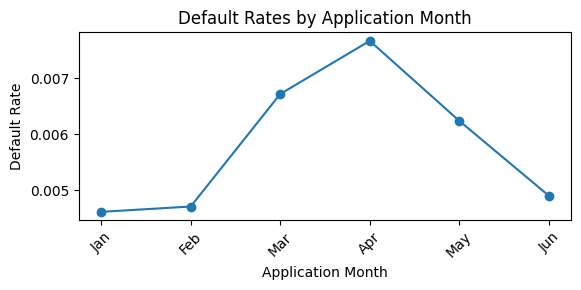

In [12]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
rate = [ default_rates[month] for month in months]
defaulters = [default_customers[month] for month in months]
total = [total_customers[month] for month in months]

# Plot the default rates
plt.figure(figsize=(6, 3))
plt.plot(months, rate, marker = 'o')
plt.xlabel('Application Month')
plt.ylabel('Default Rate')
plt.title('Default Rates by Application Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

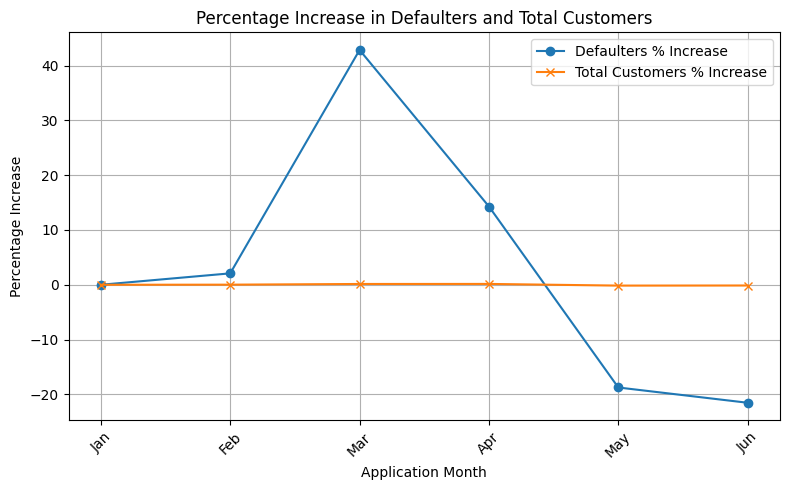

In [13]:
default_percent_increase = [0]
total_percent_increase = [0]

for i in range(1, len(defaulters)):
    increase = (defaulters[i] - defaulters[i-1]) / defaulters[i-1] * 100 if defaulters[i-1] > 0 else 0
    default_percent_increase.append(increase)

for i in range(1, len(total)):
    increase = (total[i] - total[i-1]) / total[i-1] * 100 if total[i-1] > 0 else 0
    total_percent_increase.append(increase)

# Plotting the percentage increase
plt.figure(figsize=(8, 5))
plt.plot(months, default_percent_increase, marker='o', label='Defaulters % Increase')
plt.plot(months, total_percent_increase, marker='x', label='Total Customers % Increase')

plt.xlabel('Application Month')
plt.ylabel('Percentage Increase')
plt.title('Percentage Increase in Defaulters and Total Customers')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


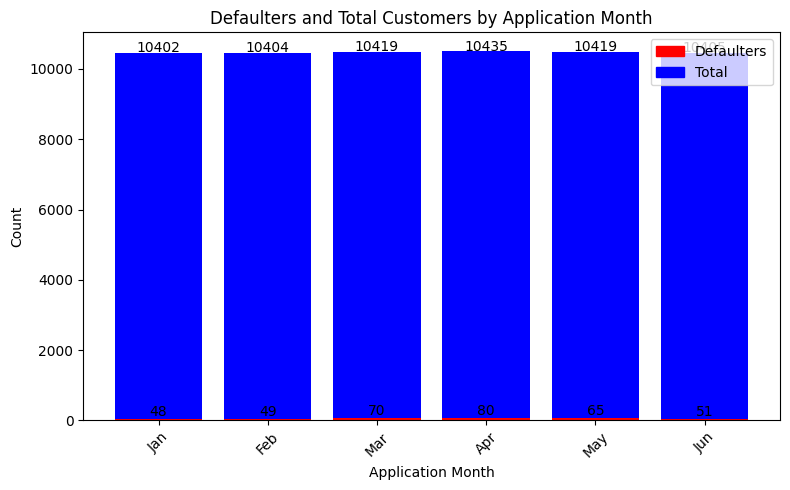

In [14]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(8, 5))

bar1 = ax.bar(months, defaulters, label='Defaulters', color='red')
bar2 = ax.bar(months, total, bottom=defaulters, label='Total', color='blue')

# Add count labels on top of bars
for bar in bar1 + bar2:
    height = bar.get_height()
    label_text = int(height)
    ax.text(bar.get_x() + bar.get_width() / 2, height, label_text, ha='center', va='bottom')

ax.set_xlabel('Application Month')
ax.set_ylabel('Count')
ax.set_title('Defaulters and Total Customers by Application Month')
ax.legend(handles=[
    mpatches.Patch(color='red', label='Defaulters'),
    mpatches.Patch(color='blue', label='Total')
])

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
df_defaulted = df[df['default_ind'] == 1] #only defaulters

In [17]:
mean_risk3_defaulters = df_defaulted.groupby('appl_month')['risk_score_3'].mean()

In [18]:
df_non_defaulted = df[df['default_ind'] == 0] #only defaulters
mean_risk3_non_defaulters = df_non_defaulted.groupby('appl_month')['risk_score_3'].mean()

In [19]:
mean_risk3 = df.groupby('appl_month')['risk_score_3'].mean()

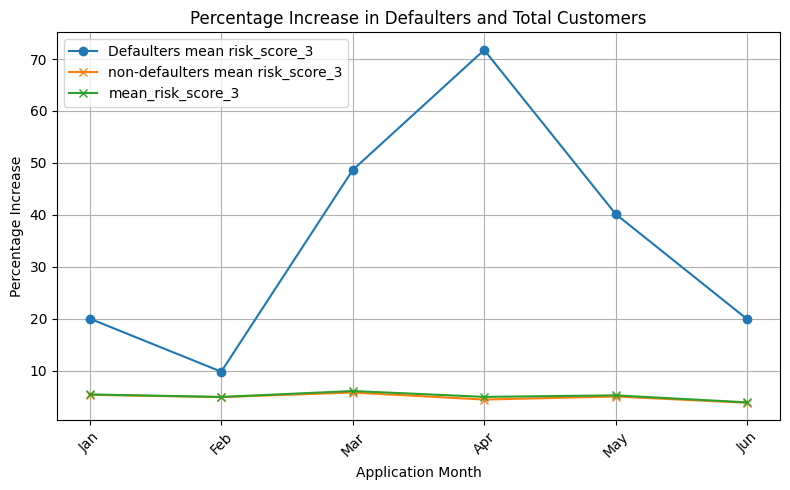

In [20]:

plt.figure(figsize=(8, 5))
plt.plot(months, [mean_risk3_defaulters[month] for month in months], marker='o', label='Defaulters mean risk_score_3')
plt.plot(months, [mean_risk3_non_defaulters[month] for month in months], marker='x', label='non-defaulters mean risk_score_3')
plt.plot(months, [mean_risk3[month] for month in months], marker='x', label='mean_risk_score_3')

plt.xlabel('Application Month')
plt.ylabel('Percentage Increase')
plt.title('Percentage Increase in Defaulters and Total Customers')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


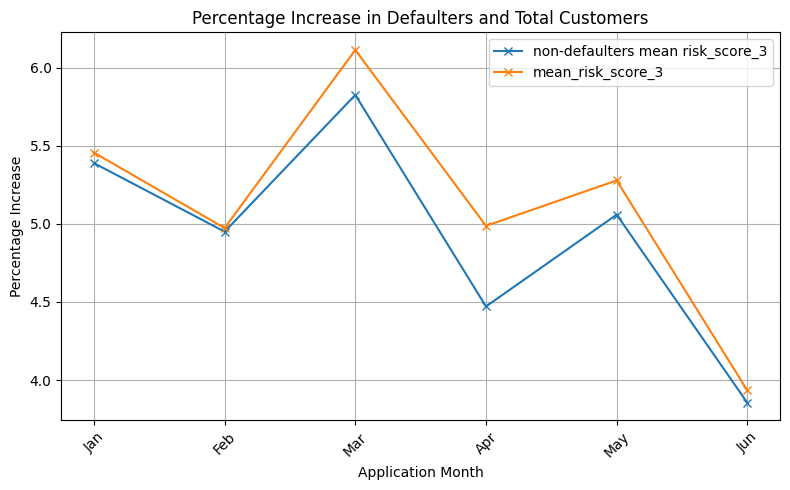

In [21]:
plt.figure(figsize=(8, 5))
# plt.plot(months, [mean_risk3_defaulters[month] for month in months], marker='o', label='Defaulters mean risk_score_3')
plt.plot(months, [mean_risk3_non_defaulters[month] for month in months], marker='x', label='non-defaulters mean risk_score_3')
plt.plot(months, [mean_risk3[month] for month in months], marker='x', label='mean_risk_score_3')

plt.xlabel('Application Month')
plt.ylabel('Percentage Increase')
plt.title('Percentage Increase in Defaulters and Total Customers')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

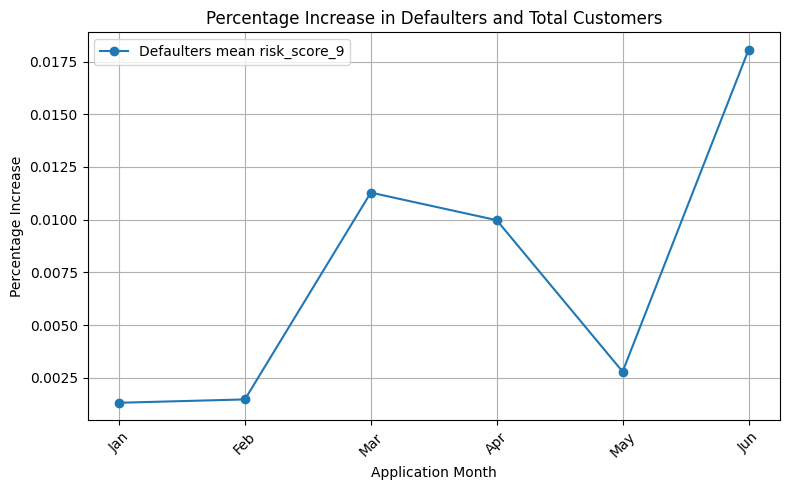

In [22]:
mean_R9 = df_defaulted.groupby('appl_month')['risk_score_9'].mean()

plt.figure(figsize=(8, 5))
plt.plot(months, [mean_R9[month] for month in months], marker='o', label='Defaulters mean risk_score_9')

plt.xlabel('Application Month')
plt.ylabel('Percentage Increase')
plt.title('Percentage Increase in Defaulters and Total Customers')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

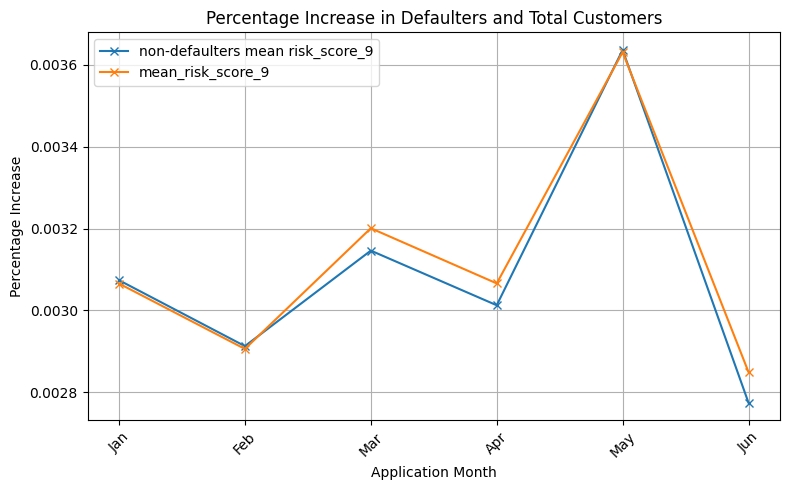

In [23]:
mean_R9_non = df_non_defaulted.groupby('appl_month')['risk_score_9'].mean()
mean_risk9 = df.groupby('appl_month')['risk_score_9'].mean()
plt.figure(figsize=(8, 5))
# plt.plot(months, [mean_risk3_defaulters[month] for month in months], marker='o', label='Defaulters mean risk_score_3')
plt.plot(months, [mean_R9_non[month] for month in months], marker='x', label='non-defaulters mean risk_score_9')
plt.plot(months, [mean_risk9[month] for month in months], marker='x', label='mean_risk_score_9')

plt.xlabel('Application Month')
plt.ylabel('Percentage Increase')
plt.title('Percentage Increase in Defaulters and Total Customers')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

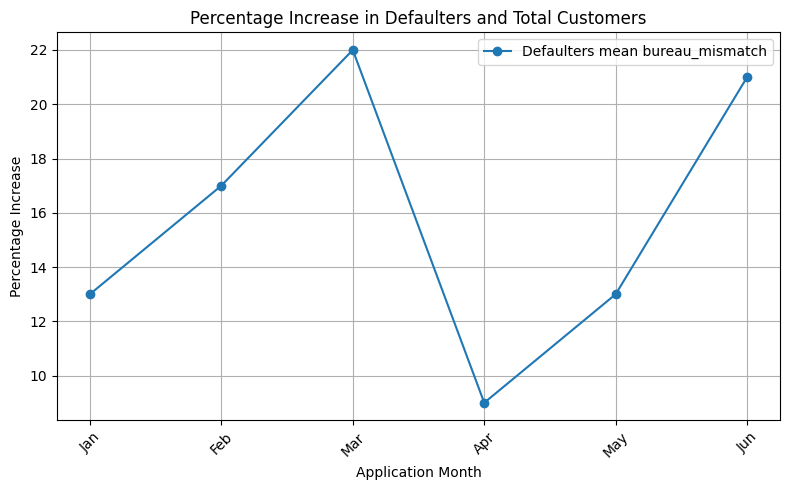

In [24]:
bureau_mismatch = df_defaulted.groupby('appl_month')['bureau_mismatch'].sum()

plt.figure(figsize=(8, 5))
plt.plot(months, [bureau_mismatch[month] for month in months], marker='o', label='Defaulters mean bureau_mismatch')

plt.xlabel('Application Month')
plt.ylabel('Percentage Increase')
plt.title('Percentage Increase in Defaulters and Total Customers')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


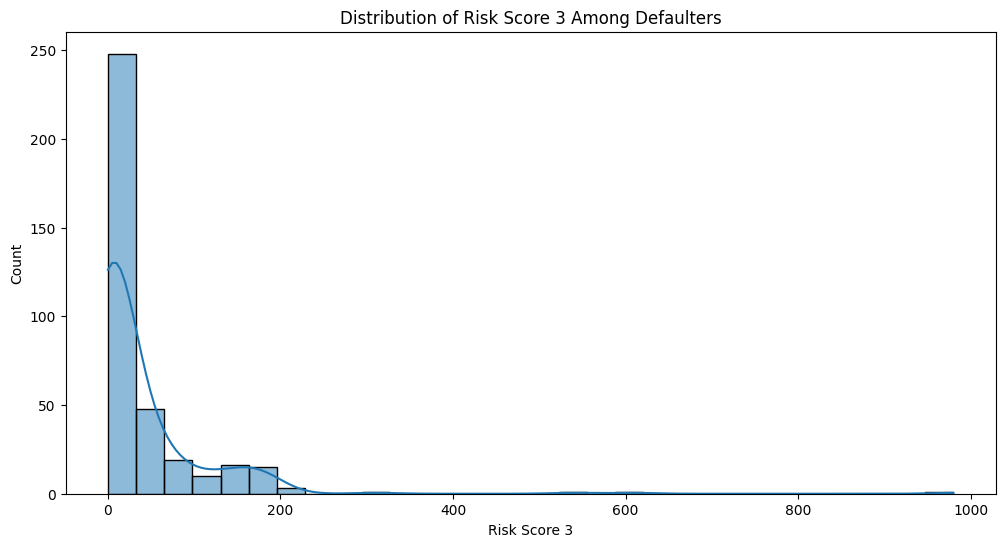

Statistics for Risk Score 3:
count    363.000000
mean      39.162534
std       82.946388
min        0.000000
25%        1.000000
50%        6.000000
75%       42.000000
max      980.000000
Name: risk_score_3, dtype: float64
Percentage of defaulters in different ranges of Risk Score 3:
risk_score_3_range
10+     43.801653
0-2     37.741047
2-4      8.815427
4-6      6.060606
6-8      2.203857
8-10     1.377410
Name: proportion, dtype: float64


/tmp/ipykernel_35/2435389225.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defaulted['risk_score_3_range'] = pd.cut(df_defaulted['risk_score_3'], bins=ranges, labels=labels, include_lowest=True)


In [25]:

import seaborn as sns

# Create a histogram and kernel density estimation (KDE) plot for risk_score_3
plt.figure(figsize=(12, 6))
sns.histplot(data=df_defaulted, x='risk_score_3', kde=True, bins=30)
plt.title('Distribution of Risk Score 3 Among Defaulters')
plt.xlabel('Risk Score 3')
plt.ylabel('Count')
plt.show()

# Calculate and print some basic statistics for risk_score_3
stats = df_defaulted['risk_score_3'].describe()
print("Statistics for Risk Score 3:")
print(stats)

# Calculate the percentage of defaulters in different ranges of risk_score_3
ranges = [0, 2, 4, 6, 8, 10, float('inf')]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10+']
df_defaulted['risk_score_3_range'] = pd.cut(df_defaulted['risk_score_3'], bins=ranges, labels=labels, include_lowest=True)
range_percentages = df_defaulted['risk_score_3_range'].value_counts(normalize=True) * 100

print("\
Percentage of defaulters in different ranges of Risk Score 3:")
print(range_percentages)

In [26]:
df_defaulted[df_defaulted.risk_score_9 > 2].count()

unique_identifier        0
appl_month               0
prod_name                0
acq_channel              0
state_code               0
bureau_src               0
risk_score_1             0
bureau_score             0
limit                    0
income                   0
old_open_trd_ms          0
no_open_trd              0
no_trd                   0
debt_cap                 0
basic_max_trd_tnr        0
basic_no_trd             0
risk_score_2             0
trust_identity           0
risk_score_3             0
no_inq                   0
risk_score_4             0
income_incons            0
bureau_mismatch          0
risk_score_5             0
risk_score_6             0
addr_mismatch            0
basic_old_open_trd_ms    0
addr_ds                  0
dl_id                    0
addr_changes             0
no_phn_to_addr           0
no_nid_to_addr           0
no_uid_to_addr           0
uid_addr_matches         0
uid_nid_matches          0
home_value               0
no_addr_to_nid           0
r

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


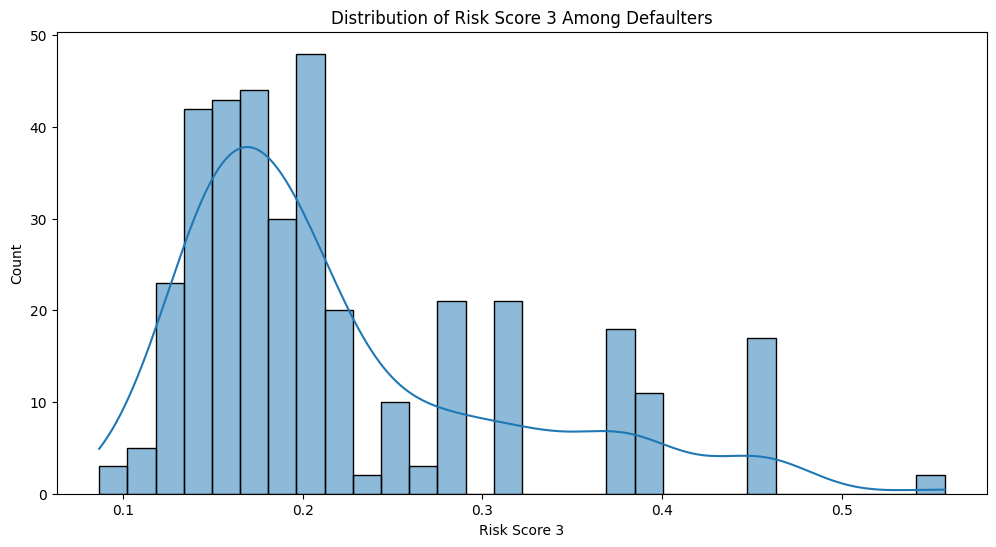

Statistics for Risk Score 3:
count    363.000000
mean       0.221372
std        0.092269
min        0.086800
25%        0.158400
50%        0.188400
75%        0.262700
max        0.557300
Name: risk_score_11, dtype: float64
Percentage of defaulters in different ranges of Risk Score 3:
risk_score_11_range
0-2     100.0
2-4       0.0
4-6       0.0
6-8       0.0
8-10      0.0
10+       0.0
Name: proportion, dtype: float64


/tmp/ipykernel_35/1297089067.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defaulted['risk_score_11_range'] = pd.cut(df_defaulted['risk_score_11'], bins=ranges, labels=labels, include_lowest=True)


In [27]:
# Create a histogram and kernel density estimation (KDE) plot for risk_score_3
plt.figure(figsize=(12, 6))
sns.histplot(data=df_defaulted, x='risk_score_11', kde=True, bins=30)
plt.title('Distribution of Risk Score 3 Among Defaulters')
plt.xlabel('Risk Score 3')
plt.ylabel('Count')
plt.show()

# Calculate and print some basic statistics for risk_score_3
stats = df_defaulted['risk_score_11'].describe()
print("Statistics for Risk Score 3:")
print(stats)

# Calculate the percentage of defaulters in different ranges of risk_score_3
ranges = [0, 2, 4, 6, 8, 10, float('inf')]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10+']
df_defaulted['risk_score_11_range'] = pd.cut(df_defaulted['risk_score_11'], bins=ranges, labels=labels, include_lowest=True)
range_percentages = df_defaulted['risk_score_11_range'].value_counts(normalize=True) * 100

print("\
Percentage of defaulters in different ranges of Risk Score 3:")
print(range_percentages)

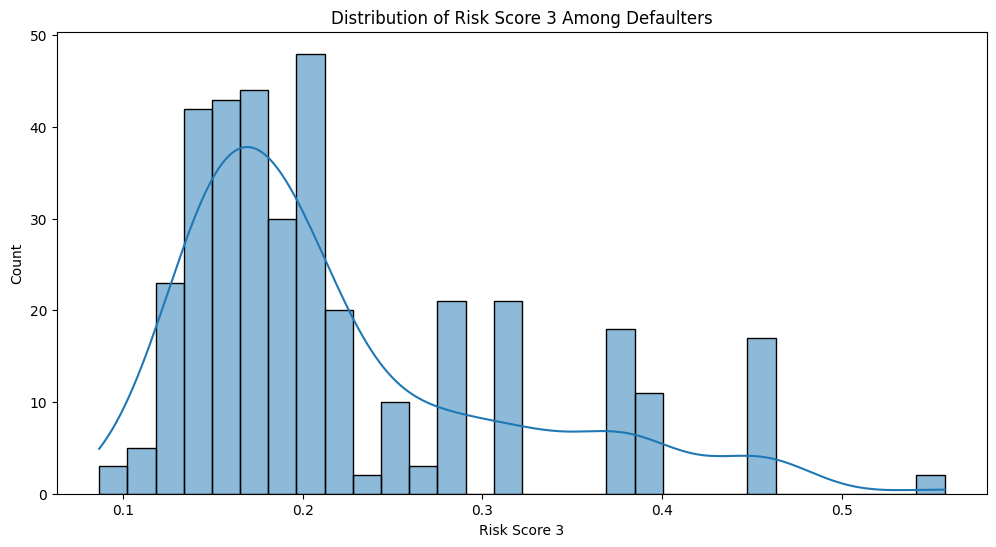

Statistics for Risk Score 3:

count    363.000000

mean       0.221372

std        0.092269

min        0.086800

25%        0.158400

50%        0.188400

75%        0.262700

max        0.557300

Name: risk_score_11, dtype: float64

Percentage of defaulters in different ranges of Risk Score 3:

risk_score_11_range

0-2     100.0

2-4       0.0

4-6       0.0

6-8       0.0

8-10      0.0

10+       0.0

Name: proportion, dtype: float64


<ipython-input-22-b553bcca1766>:17: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_defaulted['risk_score_11_range'] = pd.cut(df_defaulted['risk_score_11'], bins=ranges, labels=labels, include_lowest=True)


In [ ]:

# Create a histogram and kernel density estimation (KDE) plot for risk_score_3
plt.figure(figsize=(12, 6))
sns.histplot(data=df_defaulted, x='risk_score_11', kde=True, bins=30)
plt.title('Distribution of Risk Score 3 Among Defaulters')
plt.xlabel('Risk Score 3')
plt.ylabel('Count')
plt.show()

# Calculate and print some basic statistics for risk_score_3
stats = df_defaulted['risk_score_11'].describe()
print("Statistics for Risk Score 3:")
print(stats)

# Calculate the percentage of defaulters in different ranges of risk_score_3
ranges = [0, 2, 4, 6, 8, 10, float('inf')]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10+']
df_defaulted['risk_score_11_range'] = pd.cut(df_defaulted['risk_score_11'], bins=ranges, labels=labels, include_lowest=True)
range_percentages = df_defaulted['risk_score_11_range'].value_counts(normalize=True) * 100

print("\
Percentage of defaulters in different ranges of Risk Score 3:")
print(range_percentages)

In [ ]:
# prompt: write a funtction that takes list of colms, threshold as input and output the dataframe that falls out of the threshold SD out of the mean of the colms. use abs function

def outliers(df, cols, threshold):
  df_out = df.copy()
  for col in cols:
    mean = df_out[col].mean()
    std = df_out[col].std()
    df_out = df_out[abs(df_out[col] - mean) >= threshold * std]
  return df_out


In [ ]:
filtered = outliers(df, ['risk_score_3'], 1)

In [ ]:
filtered

,unique_identifier,appl_month,prod_name,acq_channel,state_code,bureau_src,risk_score_1,bureau_score,limit,income,...,merchant2_cat,merchant3,merchant3_amt,merchant3_ten,merchant3_cat,risk_score_8,risk_score_9,risk_score_10,risk_score_11,default_ind
122,123682,Mar,Product 1,Channel 4,MA,No Bureau Hit,7.6,650,1000,25000,...,0,168544,68.46,12,0,0.999,0.0013,0.073,0.2627,0
237,162231,Jun,Product 6,Channel 1,GA,Bureau 1,4.4,900,1000,50000,...,0,121252,293.39,12,0,0.052,0.0000,0.000,0.1609,0
270,129136,Mar,Product 8,Channel 2,NJ,No Bureau Hit,0.0,700,10000,140000,...,1,145138,26.85,12,1,0.000,0.0000,0.000,0.2035,0
316,105747,Jan,Product 1,Channel 3,TX,No Bureau Hit,0.0,800,25000,110000,...,1,117377,4.00,12,0,0.010,0.0001,0.052,0.2878,0
322,159911,Jun,Product 1,Channel 2,WA,Bureau 1,0.3,800,12000,95000,...,1,168248,54.96,4,1,0.019,0.0004,0.033,0.1720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62095,135266,Apr,Product 1,Channel 1,TX,Bureau 1,3.7,700,2000,90000,...,0,0,0.00,0,0,0.000,0.0000,0.000,0.1858,0
62193,150765,May,Product 7,Channel 4,LA,Bureau 1,0.1,775,30000,160000,...,0,0,0.00,0,0,0.000,0.0000,0.000,0.1592,0
62260,161546,Jun,Product 7,Channel 4,CO,Bureau 1,0.1,800,10000,80000,...,0,0,0.00,0,0,0.000,0.0000,0.000,0.1858,0
62385,114813,Feb,Product 1,Channel 2,FL,Bureau 1,0.2,900,5000,40000,...,0,137004,672.57,12,0,0.000,0.0000,0.000,0.1662,0


In [ ]:
filtered[filtered['default_ind'] == 1]

,unique_identifier,appl_month,prod_name,acq_channel,state_code,bureau_src,risk_score_1,bureau_score,limit,income,...,merchant2_cat,merchant3,merchant3_amt,merchant3_ten,merchant3_cat,risk_score_8,risk_score_9,risk_score_10,risk_score_11,default_ind
572,130049,Mar,Product 1,Channel 4,GA,Bureau 1,2.8,750,2000,75000,...,0,166953,966.98,12,0,0.000,0.0000,0.055,0.2035,1
641,131237,Apr,Product 1,Channel 3,IL,Bureau 2,0.3,800,9100,85000,...,0,137918,108.00,9,1,0.016,0.0006,0.018,0.3218,1
642,131250,Apr,Product 1,Channel 3,NC,Bureau 2,1.3,725,8000,55000,...,0,164843,863.83,1,1,0.010,0.0006,0.106,0.3218,1
643,131246,Apr,Product 1,Channel 3,NJ,Bureau 2,0.3,800,25000,60000,...,0,164843,21.86,1,1,0.009,0.0003,0.132,0.3716,1
1342,131239,Apr,Product 1,Channel 3,NY,Bureau 2,0.8,775,14000,50000,...,1,164838,975.00,0,1,0.000,0.0000,0.041,0.4551,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53015,157857,Jun,Product 1,Channel 3,NY,Bureau 1,1.8,750,2000,80000,...,0,0,0.00,0,0,0.000,0.0000,0.000,0.1270,1
54579,152390,Jun,Product 6,Channel 2,CA,Bureau 1,2.0,900,5000,90000,...,0,0,0.00,0,0,0.000,0.0000,0.000,0.1971,1
56749,161442,Jun,Product 6,Channel 2,CA,Bureau 1,5.3,900,2000,100000,...,0,0,0.00,0,0,0.000,0.0000,0.000,0.2493,1
57828,139356,Apr,Product 7,Channel 1,CA,Bureau 1,0.0,900,5000,190000,...,0,0,0.00,0,0,0.000,0.0000,0.000,0.2035,1


In [ ]:
fraud_ids = [131249, 131247, 131236, 131238, 131242, 141674, 131245]

In [ ]:
# prompt: mean of  attempt_txn in defaulters and non-defaulters

mean_attempt_txn_defaulters = df_defaulted['attempt_txn'].mean()
mean_attempt_txn_non_defaulters = df_non_defaulted['attempt_txn'].mean()

print(f'Mean attempt_txn for defaulters: {mean_attempt_txn_defaulters}')
print(f'Mean attempt_txn for non-defaulters: {mean_attempt_txn_non_defaulters}')


Mean attempt_txn for defaulters: 58.55922865013774

Mean attempt_txn for non-defaulters: 44.54371307609343


In [ ]:
# prompt: mean of decline_txn in defaulters and non_defaulters

mean_decline_txn_defaulters = df_defaulted['decline_txn'].mean()
mean_decline_txn_non_defaulters = df_non_defaulted['decline_txn'].mean()

print(f'Mean decline_txn for defaulters: {mean_decline_txn_defaulters}')
print(f'Mean decline_txn for non_defaulters: {mean_decline_txn_non_defaulters}')


Mean decline_txn for defaulters: 12.730027548209366

Mean decline_txn for non_defaulters: 2.117045765522126


In [ ]:
# prompt: decline_txn > 10 in df. then find how many are there in fraud_ids

# Filter the DataFrame for decline_txn > 10
df_filtered = df[df['attempt_txn'] > 40]

# Check how many of these are in fraud_ids
fraud_count = df_filtered['unique_identifier'].isin(fraud_ids).sum()

print(f'Number of customers with decline_txn > 10 and in fraud_ids: {fraud_count}')


Number of customers with decline_txn > 10 and in fraud_ids: 2


# Filtering based on Risk Scores

In [ ]:

def filter1(df, cols, threshold):
  df_new = pd.DataFrame(columns=[col for col in cols], index=['total persons', 'defaulters', 'non_defaulters'])
  for col in cols:
    mean = df[col].mean()
    std = df[col].std()
    filtered =  df[abs(df[col] - mean) >= threshold * std]
    total = filtered.shape[0]
    defaulters = (filtered['default_ind'] == 1).sum()
    non_defaulters = (filtered['default_ind'] == 0).sum()
    df_new[col] = [total, defaulters, non_defaulters]
  return df_new

In [ ]:
insight_df = filter1(df, ['risk_score_{}'.format(i) for i in range(1, 12)], 1)

In [ ]:
insight_df

,risk_score_1,risk_score_2,risk_score_3,risk_score_4,risk_score_5,risk_score_6,risk_score_7,risk_score_8,risk_score_9,risk_score_10,risk_score_11
total persons,7633,5144,1395,7732,20697,31414,24831,3656,855,6276,16071
defaulters,70,153,102,108,120,244,230,19,11,33,121
non_defaulters,7563,4991,1293,7624,20577,31170,24601,3637,844,6243,15950


In [ ]:
def filter2(df, cols, threshold):
  df_new = pd.DataFrame(columns=['{}-{}'.format(cols[i], cols[j]) for i in range(len(cols)) for j in range(i+1, len(cols)) ], index=['total persons', 'defaulters', 'non_defaulters', 'fraud'])
  for i in range(len(cols)):
    for j in range(i+1, len(cols)):
      col1 = cols[i]
      col2 = cols[j]

      mean1 = df[col1].mean()
      std1 = df[col1].std()
      mean2 = df[col2].mean()
      std2 = df[col2].std()

      filtered =  df[(abs(df[col1] - mean1) >= threshold * std1) & (abs(df[col2] - mean2) >= threshold * std2)]
      total = filtered.shape[0]
      defaulters = (filtered['default_ind'] == 1).sum()
      non_defaulters = (filtered['default_ind'] == 0).sum()
      fraud_count = filtered['unique_identifier'].isin(fraud_ids).sum()
      df_new['{}-{}'.format(cols[i], cols[j])] = [total, defaulters, non_defaulters, fraud_count]
  return df_new

In [ ]:
filtered = filter2(df, ['risk_score_{}'.format(i) for i in range(1, 12)], 1)

In [ ]:
filtered

,risk_score_1-risk_score_2,risk_score_1-risk_score_3,risk_score_1-risk_score_4,risk_score_1-risk_score_5,risk_score_1-risk_score_6,risk_score_1-risk_score_7,risk_score_1-risk_score_8,risk_score_1-risk_score_9,risk_score_1-risk_score_10,risk_score_1-risk_score_11,...,risk_score_7-risk_score_8,risk_score_7-risk_score_9,risk_score_7-risk_score_10,risk_score_7-risk_score_11,risk_score_8-risk_score_9,risk_score_8-risk_score_10,risk_score_8-risk_score_11,risk_score_9-risk_score_10,risk_score_9-risk_score_11,risk_score_10-risk_score_11
total persons,2376,224,1470,2177,4643,2873,440,93,780,1887,...,1422,347,2477,5739,615,688,950,291,215,1605
defaulters,39,8,12,22,43,29,1,0,6,17,...,12,8,23,92,6,1,4,1,1,11
non_defaulters,2337,216,1458,2155,4600,2844,439,93,774,1870,...,1410,339,2454,5647,609,687,946,290,214,1594
fraud,0,0,0,0,0,0,0,0,0,0,...,0,0,1,7,0,0,0,0,0,1


In [ ]:
# prompt: set the pandas option to display max columsn to 50

import pandas as pd
pd.set_option('display.max_columns', 60)


In [ ]:
def filter3(df_out):
  mean_7 = df_out['risk_score_7'].mean()
  std_7 = df_out['risk_score_7'].std()
  mean_3 = df_out['risk_score_3'].mean()
  std_3 = df_out['risk_score_3'].std()
  mean_11 = df_out['risk_score_11'].mean()
  std_11 = df_out['risk_score_11'].std()
  df = df_out[(abs(df_out['risk_score_3'] - mean_3) >= std_3)  & (abs(df_out['risk_score_7'] - mean_7) >= std_7) & (abs(df_out['risk_score_11'] - mean_11) >= std_11)]
  return df

filtered = filter3(df)
filtered

,unique_identifier,appl_month,prod_name,acq_channel,state_code,bureau_src,risk_score_1,bureau_score,limit,income,old_open_trd_ms,no_open_trd,no_trd,debt_cap,basic_max_trd_tnr,basic_no_trd,risk_score_2,trust_identity,risk_score_3,no_inq,risk_score_4,income_incons,bureau_mismatch,risk_score_5,risk_score_6,addr_mismatch,basic_old_open_trd_ms,addr_ds,dl_id,addr_changes,...,no_nid_to_addr,no_uid_to_addr,uid_addr_matches,uid_nid_matches,home_value,no_addr_to_nid,risk_score_7,no_trd_del,spend,payments,return_payments,attempt_txn,decline_txn,merchant1,merchant1_amt,merchant1_ten,merchant1_cat,merchant2,merchant2_amt,merchant2_ten,merchant2_cat,merchant3,merchant3_amt,merchant3_ten,merchant3_cat,risk_score_8,risk_score_9,risk_score_10,risk_score_11,default_ind
316,105747,Jan,Product 1,Channel 3,TX,No Bureau Hit,0.0,800,25000,110000,0,0,0,48060.333333,0,0,0.00293,Y,107,0,0,0.79333,2,96,29,NaN,0,-1,7,6,...,14,15,11,6,0,9,498,-1,6691.00,3295.0000,0,51,17,102539,3371.86,12,1,168146,832.00,9,1,117377,4.00,12,0,0.010,0.0001,0.052,0.2878,0
418,130368,Mar,Product 1,Channel 3,AZ,Bureau 1,0.2,800,6000,75000,239,5,14,50491.500000,239,13,0.00070,Y,67,0,709,0.20000,0,78,86,N,239,4160,4,6,...,11,13,7,4,538947,12,439,12,1794.79,570.0000,0,2,0,145683,1717.41,5,1,167857,77.38,12,0,0,0.00,0,0,0.149,0.0000,0.000,0.1216,0
641,131237,Apr,Product 1,Channel 3,IL,Bureau 2,0.3,800,9100,85000,251,9,25,46186.666667,0,0,0.00320,Y,67,1,0,0.60714,0,55,95,Y,251,4321,0,0,...,11,10,8,4,283148,5,479,22,5032.73,1358.8371,0,14,3,163070,4499.94,11,1,167574,424.79,12,0,137918,108.00,9,1,0.016,0.0006,0.018,0.3218,1
642,131250,Apr,Product 1,Channel 3,NC,Bureau 2,1.3,725,8000,55000,354,1,13,38000.000000,0,0,0.01931,Y,156,0,0,0.20357,0,62,15,Y,354,1026,6,6,...,22,22,5,5,821996,16,463,12,7697.00,2540.0100,0,74,16,163070,5249.93,11,1,167574,1121.46,12,0,164843,863.83,1,1,0.010,0.0006,0.106,0.3218,1
643,131246,Apr,Product 1,Channel 3,NJ,Bureau 2,0.3,800,25000,60000,254,3,13,40000.000000,0,0,0.00970,Y,48,0,0,0.24390,0,55,95,Y,254,9569,-1,0,...,6,9,0,0,176000,8,467,12,7462.00,2238.6000,0,10,3,163070,2249.97,11,1,167574,1455.48,12,0,164843,21.86,1,1,0.009,0.0003,0.132,0.3716,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59420,149920,May,Product 7,Channel 3,GA,Bureau 1,0.1,750,8000,120000,197,5,14,82851.000000,162,4,0.00941,Y,59,0,905,0.72727,1,98,76,N,162,5565,2,6,...,3,3,8,3,520550,4,406,8,0.00,0.0000,0,0,0,0,0.00,0,0,0,0.00,0,0,0,0.00,0,0,0.000,0.0000,0.000,0.2979,0
59729,134151,Apr,Product 1,Channel 3,SC,Bureau 2,0.2,800,30000,75000,269,4,8,51595.000000,0,0,0.00982,Y,136,0,0,0.42482,0,62,19,N,90,6112,2,6,...,4,4,8,4,460000,4,472,5,0.00,0.0000,0,0,0,0,0.00,0,0,0,0.00,0,0,0,0.00,0,0,0.000,0.0000,0.000,0.3716,0
59923,101787,Jan,Product 6,Channel 1,CA,Bureau 1,5.5,650,3700,360000,128,4,11,216009.333333,128,9,0.02558,N,68,5,97,2.08343,1,0,96,N,128,4375,2,5,...,43,64,2,3,830000,5,441,9,0.00,0.0000,0,0,0,0,0.00,0,0,0,0.00,0,0,0,0.00,0,0,0.000,0.0000,0.000,0.2787,0
61034,154701,Jun,Product 8,Channel 1,MS,Bureau 1,0.1,775,37500,300000,171,5,14,166015.000000,171,9,0.00095,Y,506,2,907,1.00000,1,96,29,N,171,31,6,6,...,11,12,10,3,0,12,474,12,0.00,0.0000,0,0,0,0,0.00,0,0,0,0.00,0,0,0,0.00,0,0,0.000,0.0000,0.000,0.2787,0


In [ ]:
fraud_count = filtered['unique_identifier'].isin(fraud_ids).sum()
fraud_count

7

In [ ]:
print('Total numbers of filtered rows: ',  filtered.shape[0])
print('defaulters: ',(filtered['default_ind'] == 1).sum())
print('non-defaulters: ',(filtered['default_ind'] == 0).sum())

Total numbers of filtered rows:  237

defaulters:  64

non-defaulters:  173


In [ ]:
print('Total unique merchant1 of defaulters: ', filtered[filtered['default_ind'] == 1].merchant1.nunique())
print('Total unique merchant1 of non-defaulters: ', filtered[filtered['default_ind'] == 0].merchant1.nunique())

Total unique merchant1 of defaulters:  15

Total unique merchant1 of non-defaulters:  132


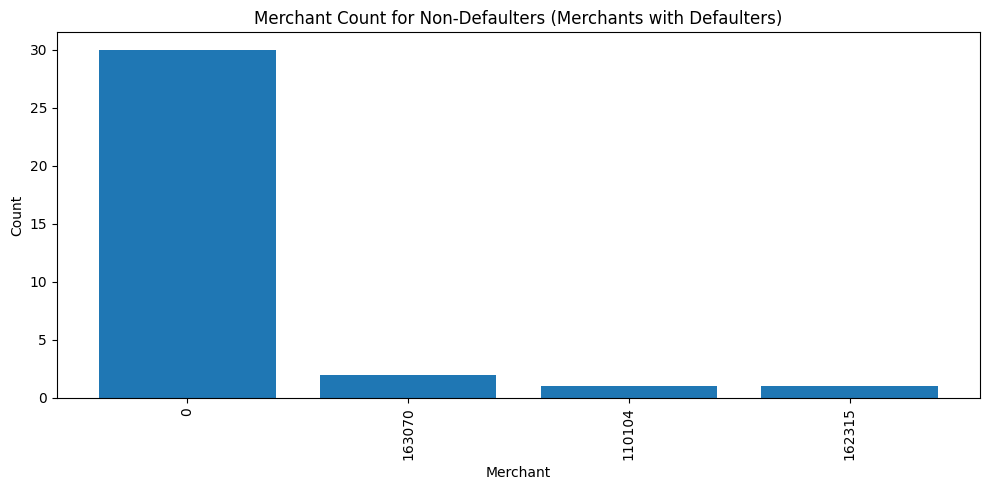

List of merchant1 for defaulters in filtered:

[163070 167574 164428 164845 166949 164649 164435 166089 161244 129857

 135528 162315 157027 110104      0]


In [ ]:
# prompt: give the list of merchant1 for defaulters in filtered. plot the merchant count for each merchant in the previous list for non defaulters

import matplotlib.pyplot as plt
# Get the list of merchant1 for defaulters in filtered
defaulter_merchants = filtered[filtered['default_ind'] == 1].merchant1.unique()

# Count the occurrences of each defaulter merchant in non-defaulters
merchant_counts = filtered[filtered['default_ind'] == 0].merchant1.value_counts()

# Filter merchant counts to include only defaulter merchants
merchant_counts = merchant_counts[merchant_counts.index.isin(defaulter_merchants)]

# Plot the merchant counts
plt.figure(figsize=(10, 5))
plt.bar([str(i) for i in merchant_counts.index], merchant_counts.values)
plt.xlabel('Merchant')
plt.ylabel('Count')
plt.title('Merchant Count for Non-Defaulters (Merchants with Defaulters)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print('List of merchant1 for defaulters in filtered:')
print(defaulter_merchants)


In [ ]:
defaulter_merchants = filtered[filtered['default_ind'] == 1].merchant1.unique()
merchant_counts = filtered[filtered['default_ind'] == 0].merchant1.value_counts()
merchant_counts = merchant_counts[merchant_counts.index.isin(defaulter_merchants)]
merchant_counts

,count
merchant1,
0,30
163070,2
110104,1
162315,1


In [ ]:
defaulters = filtered[filtered['default_ind'] == 1]
non_defaulters = filtered[filtered['default_ind'] == 0]

In [ ]:
best_fraud_list =list( defaulters['unique_identifier'])

In [ ]:
defaulters.describe()

,unique_identifier,risk_score_1,bureau_score,limit,income,old_open_trd_ms,no_open_trd,no_trd,debt_cap,basic_max_trd_tnr,basic_no_trd,risk_score_2,risk_score_3,no_inq,risk_score_4,income_incons,bureau_mismatch,risk_score_5,risk_score_6,basic_old_open_trd_ms,addr_ds,dl_id,addr_changes,no_phn_to_addr,no_nid_to_addr,no_uid_to_addr,uid_addr_matches,uid_nid_matches,home_value,no_addr_to_nid,risk_score_7,no_trd_del,spend,payments,return_payments,attempt_txn,decline_txn,merchant1,merchant1_amt,merchant1_ten,merchant1_cat,merchant2,merchant2_amt,merchant2_ten,merchant2_cat,merchant3,merchant3_amt,merchant3_ten,merchant3_cat,risk_score_8,risk_score_9,risk_score_10,risk_score_11,default_ind
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,6.400000e+01,64.000000,64.000000,64.00000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.0000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.0
mean,132789.093750,1.096875,807.812500,14000.000000,66093.750000,233.812500,4.234375,9.687500,34772.651458,18.687500,0.921875,0.017811,121.421875,0.546875,78.656250,0.354816,0.109375,56.593750,35.031250,178.593750,6035.656250,2.125000,3.328125,10.203125,12.593750,15.859375,5.468750,3.093750,2.723825e+05,16.546875,462.812500,7.43750,7794.367344,1274.369686,1156.593750,26.578125,8.609375,132943.656250,4595.782812,7.375000,0.4375,86223.890625,972.659687,4.968750,0.468750,78717.187500,410.485469,3.984375,0.296875,0.024594,0.001066,0.061781,0.360020,1.0
std,9438.167052,1.735435,59.740676,8726.278503,18760.579026,165.190787,3.723551,8.417433,18785.052889,68.182033,3.056633,0.016484,77.179610,0.640676,215.831226,0.143690,0.403051,16.590032,32.267222,132.034353,3997.461827,2.657723,2.828734,24.193125,21.095188,28.887778,4.364244,2.700492,2.562898e+05,43.302161,15.338379,7.12446,6976.590699,1959.906880,6627.868689,82.468619,46.670618,61982.675058,4093.617515,4.958558,0.5000,79907.462487,1473.595726,5.465531,0.502967,80210.898565,791.347517,5.521939,0.460493,0.052799,0.002478,0.107029,0.092247,0.0
min,100018.000000,0.000000,675.000000,1000.000000,40000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000,0.000000,0.000000,0.026000,0.000000,10.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000e+00,0.000000,403.000000,-1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.092900,1.0
25%,131228.750000,0.375000,775.000000,6000.000000,55000.000000,99.000000,1.000000,3.250000,28958.333333,0.000000,0.000000,0.005795,66.500000,0.000000,0.000000,0.288275,0.000000,54.250000,18.000000,17.500000,2065.250000,0.000000,0.000000,2.750000,5.000000,6.000000,0.000000,0.000000,0.000000e+00,5.000000,452.000000,1.50000,1218.000000,0.000000,0.000000,3.000000,0.000000,160189.750000,1218.000000,2.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.321800,1.0
50%,131246.500000,0.600000,800.000000,13250.000000,62500.000000,246.000000,4.000000,9.500000,36666.666667,0.000000,0.000000,0.012570,119.000000,0.000000,0.000000,0.326425,0.000000,62.000000,19.000000,174.500000,6909.500000,2.000000,5.000000,4.000000,7.500000,9.000000,7.000000,4.500000,2.576730e+05,7.000000,464.000000,7.00000,7706.500000,831.274700,0.000000,10.500000,1.000000,163070.000000,4063.555000,11.000000,0.0000,131952.500000,100.605000,1.000000,0.000000,50737.000000,0.000000,0.000000,0.000000,0.002000,0.000100,0.031500,0.371600,1.0
75%,141663.250000,1.325000,812.500000,21000.000000,70000.000000,355.000000,6.000000,14.0

In [ ]:
non_defaulters.describe()

,unique_identifier,risk_score_1,bureau_score,limit,income,old_open_trd_ms,no_open_trd,no_trd,debt_cap,basic_max_trd_tnr,basic_no_trd,risk_score_2,risk_score_3,no_inq,risk_score_4,income_incons,bureau_mismatch,risk_score_5,risk_score_6,basic_old_open_trd_ms,addr_ds,dl_id,addr_changes,no_phn_to_addr,no_nid_to_addr,no_uid_to_addr,uid_addr_matches,uid_nid_matches,home_value,no_addr_to_nid,risk_score_7,no_trd_del,spend,payments,return_payments,attempt_txn,decline_txn,merchant1,merchant1_amt,merchant1_ten,merchant1_cat,merchant2,merchant2_amt,merchant2_ten,merchant2_cat,merchant3,merchant3_amt,merchant3_ten,merchant3_cat,risk_score_8,risk_score_9,risk_score_10,risk_score_11,default_ind
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,1.730000e+02,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,1.730000e+02,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.0
mean,130870.728324,2.528902,772.832370,10715.606936,138179.190751,129.682081,3.601156,8.080925,1.951882e+05,82.838150,5.364162,0.020221,107.086705,0.682081,363.202312,1.410367,0.387283,66.115607,50.254335,98.554913,2105.855491,3.381503,3.745665,22.479769,21.722543,28.219653,5.132948,3.439306,4.597361e+05,18.601156,429.109827,5.930636,8816.058844,7175.971098,109.213873,46.005780,2.612717,113892.156069,1542.429364,9.271676,0.294798,103475.676301,580.169827,8.543353,0.254335,89046.265896,356.970116,7.398844,0.208092,0.051884,0.002641,0.049532,0.233607,0.0
std,16537.625920,4.910238,70.393914,10187.426091,157873.798677,147.923211,5.384884,11.274293,1.199422e+06,118.356563,9.009058,0.030037,115.300308,1.341455,314.719365,6.373429,0.660567,25.161997,36.394704,127.478378,3188.233745,2.597876,2.306222,35.736209,34.877417,45.851483,2.982451,2.213348,1.486978e+06,37.953726,83.980996,10.181255,16079.220699,14889.564279,1111.569295,65.453027,7.043491,55814.036673,2126.771758,4.678148,0.457275,61770.886567,941.932978,5.240121,0.436751,66655.178345,712.991078,6.039348,0.407122,0.148632,0.021524,0.068757,0.105606,0.0
min,101560.000000,0.000000,650.000000,1000.000000,10000.000000,0.000000,0.000000,0.000000,-1.285063e+04,0.000000,0.000000,0.000130,39.000000,0.000000,0.000000,0.093330,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000e+00,-1.000000,45.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.089800,0.0
25%,119354.000000,0.000000,725.000000,2000.000000,60000.000000,0.000000,0.000000,0.000000,3.299925e+04,0.000000,0.000000,0.003000,53.000000,0.000000,51.000000,0.320000,0.000000,57.000000,18.000000,0.000000,3.000000,2.000000,1.000000,3.000000,4.000000,5.000000,3.000000,2.000000,0.000000e+00,3.000000,426.000000,-1.000000,824.270000,64.000000,0.000000,2.000000,0.000000,103016.000000,117.100000,9.000000,0.000000,100055.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.127000,0.0
50%,131406.000000,0.400000,775.000000,6100.000000,90000.000000,76.000000,1.000000,2.000000,5.049150e+04,2.000000,1.000000,0.009410,70.000000,0.000000,484.000000,0.500000,0.000000,68.000000,39.000000,19.000000,385.000000,2.000000,4.000000,6.000000,11.000000,13.000000,5.000000,3.000000,0.000000e+00,8.000000,449.000000,0.000000,4010.840000,2773.000000,0.000000,18.000000,0.000000,132179.000000,738.440000,12.000000,0.000000,123689.000000,200.000000,12.000000,0.000000,111656.000000,109.170000,12.000000,0.000000,0.004000,0.000000,0.034000,0.278700,0.

In [ ]:
(defaulters.risk_score_4	<=0 ).sum()

56

In [ ]:
(non_defaulters.risk_score_4	<=0 ).sum()

29

# Generalized

In [ ]:
def filter(df_out):
  mean_7 = df_out['risk_score_7'].mean()
  std_7 = df_out['risk_score_7'].std()
  mean_11 = df_out['risk_score_11'].mean()
  std_11 = df_out['risk_score_11'].std()
  df = df_out[(abs(df_out['risk_score_7'] - mean_7) >= std_7) & (abs(df_out['risk_score_11'] - mean_11) >= std_11)]
  return df

filtered = filter(df)
filtered.shape

(5739, 61)

In [ ]:
filtered[filtered['default_ind'] == 1].shape

(92, 61)

In [ ]:
defaulters = filtered[filtered['default_ind'] == 1]
non_defaulters = filtered[filtered['default_ind'] == 0]

In [ ]:
(defaulters.risk_score_4	<=0 ).sum()

64

In [ ]:
(non_defaulters.risk_score_4	<=0 ).sum()

1222

In [ ]:
len(best_fraud_list)

64

In [ ]:
defaulters[defaulters['risk_score_4'] <= 0]['unique_identifier'].isin(best_fraud_list).sum()

56

In [ ]:
df.describe()

,unique_identifier,risk_score_1,bureau_score,limit,income,old_open_trd_ms,no_open_trd,no_trd,debt_cap,basic_max_trd_tnr,basic_no_trd,risk_score_2,risk_score_3,no_inq,risk_score_4,income_incons,bureau_mismatch,risk_score_5,risk_score_6,basic_old_open_trd_ms,addr_ds,dl_id,addr_changes,no_phn_to_addr,no_nid_to_addr,no_uid_to_addr,uid_addr_matches,uid_nid_matches,home_value,no_addr_to_nid,risk_score_7,no_trd_del,spend,payments,return_payments,attempt_txn,decline_txn,merchant1,merchant1_amt,merchant1_ten,merchant1_cat,merchant2,merchant2_amt,merchant2_ten,merchant2_cat,merchant3,merchant3_amt,merchant3_ten,merchant3_cat,risk_score_8,risk_score_9,risk_score_10,risk_score_11,default_ind
count,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,6.248400e+04,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.00000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.00000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,6.248400e+04,62484.000000,62484.000000,62484.000000,6.248400e+04,6.248400e+04,62484.000000,62484.000000,62484.000000,62484.000000,62484.00000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.00000,62484.000000,62484.000000,62484.000000
mean,131242.500000,1.890106,772.460550,10731.355227,127925.981051,104.247503,3.834086,7.944882,1.041317e+05,77.085558,5.779143,0.006798,5.123376,0.527479,116.54702,0.874368,0.216199,77.479179,56.840503,81.525863,1805.925741,0.98302,1.130017,13.869375,14.442657,18.253393,1.729131,0.900967,4.635994e+05,13.848697,271.847129,6.000288,8.783199e+03,7.811301e+03,64.068706,44.625136,2.178702,111402.588071,1506.58314,9.190625,0.245375,98102.450915,496.924911,8.232780,0.225162,90130.369647,300.165050,7.601146,0.219992,0.053128,0.00312,0.048355,0.202346,0.005809
std,18037.721447,3.294003,71.644113,10303.905843,134003.357926,138.466501,5.519016,11.758840,1.209267e+06,119.646339,9.804006,0.015567,33.054268,1.132909,208.90175,8.711944,0.488040,21.204451,35.640326,120.476583,2936.163837,2.71305,2.644120,31.478085,37.462158,45.337470,3.531859,2.528575,4.646196e+06,42.372829,119.088868,10.863290,2.156894e+04,2.049505e+04,1131.737486,73.930590,18.638315,57284.246270,3816.49743,4.953860,0.430313,63544.014824,1161.662260,5.642287,0.417692,66263.258748,670.473955,5.957123,0.414244,0.166323,0.02954,0.072672,0.066089,0.075999
min,100001.000000,0.000000,525.000000,500.000000,1000.000000,0.000000,0.000000,0.000000,-8.138950e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000e+00,-1.000000,0.000000,-1.000000,0.000000e+00,-7.406900e+04,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.054400,0.000000
25%,115621.750000,0.000000,725.000000,2000.000000,55000.000000,0.000000,0.000000,0.000000,2.651645e+04,0.000000,0.000000,0.000490,0.000000,0.000000,3.00000,0.303553,0.000000,68.000000,19.000000,0.000000,0.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000e+00,-1.000000,181.000000,-1.000000,3.750000e+02,9.500000e+01,0.000000,2.000000,0.000000,104269.000000,86.36750,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.159200,0.000000
50%,131242.500000,0.200000,775.000000,6000.000000,90000.000000,20.000000,1.000000,2.000000,4.831467e+04,0.000000,0.000000,0.001750,1.000000,0.000000,12.00000,0.500000,0.000000,78.000000,75.000000,3.000000,336.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000e+00,-1.000000,257.000000,0.000000,2.976000e+03,2.085000e+03,0.000000,14.000000,0.000000,129568.500000,524.34000,12.000000,0.000000,12303

In [ ]:
def filter(df_out):
  mean_7 = df_out['risk_score_3'].mean()
  std_7 = df_out['risk_score_3'].std()
  df = df_out[(abs(df_out['risk_score_3'] - mean_7) >= 0.5*std_7)]
  return df

filtered_test = filter(df)
filtered_test.shape

(2440, 61)

In [ ]:
filtered_test[filtered_test['default_ind'] == 1].shape

(129, 61)

In [ ]:
# prompt: find common rows from filtered and filtered_test data on unique_identifier clm. don't merge

common_rows = filtered[filtered['unique_identifier'].isin(filtered_test['unique_identifier'])]
common_rows.shape

(345, 61)

In [ ]:
common_rows['unique_identifier'].isin(best_fraud_list).sum()

64

In [ ]:
common_rows[common_rows['default_ind'] == 1].shape

(72, 61)

In [ ]:
common_rows[(common_rows['risk_score_4'] == 0) ].shape

(108, 61)

In [ ]:
common_rows[(common_rows['risk_score_4'] == 0) & (common_rows['default_ind'] == 1)].shape

(63, 61)

In [ ]:
common_rows[(common_rows['risk_score_4'] == 0) ]['unique_identifier'].isin(best_fraud_list).sum()

56

In [ ]:
common_rows[(common_rows['risk_score_4'] == 0) ]['unique_identifier'].isin(best_fraud_list).sum()

56

# Final Fraud

In [ ]:
def filter3(df_out):
  mean_3 = df_out['risk_score_3'].mean()
  std_3 = df_out['risk_score_3'].std()
  mean_11 = df_out['risk_score_11'].mean()
  std_11 = df_out['risk_score_11'].std()
  df = df_out[(abs(df_out['risk_score_3'] - mean_3) >= 0.5*std_3)  & (abs(df_out['risk_score_11'] - mean_11) >= std_11)]
  return df

filtered = filter3(df)
filtered.shape

(542, 61)

In [ ]:
mean, std = df['risk_score_7'].mean(), df['risk_score_7'].std()
refine_filter = filtered[(filtered['risk_score_4'] == 0)  ] # Removed parentheses after 'filtered'
refine_filter.shape

(146, 61)

In [ ]:
defaulters = refine_filter[refine_filter['default_ind'] == 1]
non_defaulters = refine_filter[refine_filter['default_ind'] == 0]

In [ ]:
defaulters.shape

(64, 61)

In [ ]:
frauders = list(defaulters.unique_identifier)

In [ ]:
defaulters['unique_identifier'].isin(frauders).sum()

64

# Analysing Refine filter

In [ ]:
df[df['default_ind'] == 1].describe()

,unique_identifier,risk_score_1,bureau_score,limit,income,old_open_trd_ms,no_open_trd,no_trd,debt_cap,basic_max_trd_tnr,basic_no_trd,risk_score_2,risk_score_3,no_inq,risk_score_4,income_incons,bureau_mismatch,risk_score_5,risk_score_6,basic_old_open_trd_ms,addr_ds,dl_id,addr_changes,no_phn_to_addr,no_nid_to_addr,no_uid_to_addr,uid_addr_matches,uid_nid_matches,home_value,no_addr_to_nid,risk_score_7,no_trd_del,spend,payments,return_payments,attempt_txn,decline_txn,merchant1,merchant1_amt,merchant1_ten,merchant1_cat,merchant2,merchant2_amt,merchant2_ten,merchant2_cat,merchant3,merchant3_amt,merchant3_ten,merchant3_cat,risk_score_8,risk_score_9,risk_score_10,risk_score_11,default_ind
count,363.00000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,3.630000e+02,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,3.630000e+02,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.0
mean,131387.61708,3.164738,794.972452,7416.253444,102768.595041,94.950413,2.333333,4.570248,8.211562e+04,33.440771,1.809917,0.023943,39.162534,0.776860,224.482094,0.715237,0.261708,62.848485,40.834711,66.931129,2098.256198,1.812672,2.490358,28.986226,31.512397,39.603306,3.633609,2.231405,3.751881e+05,29.201102,375.895317,2.647383,20889.952011,9005.347162,2605.294766,58.559229,12.730028,112143.727273,4204.388623,7.730028,0.402204,90243.286501,1213.962231,7.121212,0.272727,82824.286501,533.985317,6.151515,0.198347,0.054223,0.007780,0.047909,0.221372,1.0
std,17184.63406,3.278335,87.142319,7843.530977,111565.858483,132.689696,2.726313,6.300258,3.992392e+05,79.276450,3.403721,0.023255,82.946388,1.178685,278.840331,3.598563,0.561514,22.092014,33.835566,110.708383,3355.701369,2.513643,2.419258,40.167499,51.156155,60.509962,3.512515,2.493396,8.920602e+05,59.617249,108.111003,5.705688,62177.031213,29090.890273,8424.548354,118.646621,36.171993,64053.193194,10191.001501,5.381969,0.491019,69420.251612,2520.010894,7.038306,0.445976,72288.462564,1095.858766,6.037330,0.399305,0.177612,0.054413,0.075816,0.092269,0.0
min,100001.00000,0.000000,525.000000,1000.000000,15000.000000,0.000000,0.000000,0.000000,-6.680912e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000e+00,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.086800,1.0
25%,120245.50000,0.700000,725.000000,2000.000000,55000.000000,2.000000,1.000000,1.000000,3.033050e+04,0.000000,0.000000,0.005600,1.000000,0.000000,4.000000,0.285350,0.000000,53.000000,18.000000,0.000000,55.000000,0.000000,0.000000,3.000000,4.000000,5.000000,0.000000,0.000000,0.000000e+00,1.000000,310.500000,-1.000000,75.210000,0.000000,0.000000,1.000000,0.000000,101400.000000,14.705000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.158400,1.0
50%,131240.00000,2.400000,800.000000,5000.000000,75000.000000,17.000000,1.000000,2.000000,4.808965e+04,1.000000,1.000000,0.019020,6.000000,0.000000,83.000000,0.394000,0.000000,67.000000,19.000000,7.000000,308.000000,0.000000,2.000000,8.000000,13.000000,16.000000,3.000000,3.000000,1.732500e+05,7.000000,421.000000,0.000000,4474.000000,538.000000,0.000000,14.000000,2.000000,138844.000000,1500.000000,11.000000,0.000000,120321.000000,269.900000,11.000000,0.000000,113427.000000,55.930000,7.000000,0.000000,0.002000,0.000000,0.027000,0.188400,1.0
75%,143264.00

In [ ]:
df[df['default_ind'] == 0].describe()

,unique_identifier,risk_score_1,bureau_score,limit,income,old_open_trd_ms,no_open_trd,no_trd,debt_cap,basic_max_trd_tnr,basic_no_trd,risk_score_2,risk_score_3,no_inq,risk_score_4,income_incons,bureau_mismatch,risk_score_5,risk_score_6,basic_old_open_trd_ms,addr_ds,dl_id,addr_changes,no_phn_to_addr,no_nid_to_addr,no_uid_to_addr,uid_addr_matches,uid_nid_matches,home_value,no_addr_to_nid,risk_score_7,no_trd_del,spend,payments,return_payments,attempt_txn,decline_txn,merchant1,merchant1_amt,merchant1_ten,merchant1_cat,merchant2,merchant2_amt,merchant2_ten,merchant2_cat,merchant3,merchant3_amt,merchant3_ten,merchant3_cat,risk_score_8,risk_score_9,risk_score_10,risk_score_11,default_ind
count,62121.000000,62121.000000,62121.000000,62121.000000,62121.000000,62121.000000,62121.000000,62121.000000,6.212100e+04,62121.000000,62121.000000,62121.000000,62121.00000,62121.000000,62121.000000,62121.000000,62121.000000,62121.000000,62121.000000,62121.000000,62121.000000,62121.000000,62121.000000,62121.000000,62121.000000,62121.000000,62121.000000,62121.000000,6.212100e+04,62121.000000,62121.000000,62121.000000,6.212100e+04,6.212100e+04,62121.000000,62121.000000,62121.000000,62121.000000,62121.000000,62121.00000,62121.000000,62121.000000,62121.000000,62121.000000,62121.000000,62121.000000,62121.000000,62121.000000,62121.000000,62121.000000,62121.000000,62121.000000,62121.000000,62121.0
mean,131241.652018,1.882658,772.329003,10750.726807,128072.986591,104.301830,3.842855,7.964601,1.042604e+05,77.340593,5.802337,0.006698,4.92447,0.526022,115.916308,0.875297,0.215933,77.564672,56.934032,81.611146,1804.217527,0.978172,1.122068,13.781040,14.342911,18.128636,1.718002,0.893192,4.641160e+05,13.758986,271.239130,6.019881,8.712454e+03,7.804324e+03,49.219217,44.543713,2.117046,111398.257272,1490.818690,9.19916,0.244458,98148.375429,492.734951,8.239275,0.224884,90173.062266,298.798737,7.609617,0.220119,0.053121,0.003093,0.048357,0.202235,0.0
std,18042.716258,3.292670,71.523717,10313.475726,134110.320122,138.498739,5.530006,11.780495,1.212411e+06,119.795984,9.824464,0.015455,32.43556,1.132484,208.262776,8.733034,0.487570,21.169646,35.629738,120.526962,2933.481217,2.713446,2.643339,31.399279,37.345032,45.204883,3.528980,2.526741,4.659249e+06,42.235662,118.883512,10.883239,2.108429e+04,2.043432e+04,914.749662,73.583268,18.469913,57242.888141,3742.027817,4.95003,0.429769,63505.831494,1147.743878,5.632538,0.417509,66224.705709,666.965257,5.955663,0.414330,0.166257,0.029331,0.072654,0.065891,0.0
min,100029.000000,0.000000,525.000000,500.000000,1000.000000,0.000000,0.000000,0.000000,-8.138950e+05,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000e+00,-1.000000,0.000000,-1.000000,0.000000e+00,-7.406900e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054400,0.0
25%,115608.000000,0.000000,725.000000,2000.000000,55000.000000,0.000000,0.000000,0.000000,2.648019e+04,0.000000,0.000000,0.000490,0.00000,0.000000,3.000000,0.304000,0.000000,68.000000,19.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000e+00,-1.000000,181.000000,-1.000000,3.751200e+02,9.900000e+01,0.000000,2.000000,0.000000,104280.000000,86.560000,9.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.159200,0.0
50%,131260.000000,0.200000,750.000000,6000.000000,90000.000000,20.000000,1.000000,2.000000,4.831533e+04,0.000000,0.000000,0.001730,1.00000,0.000000,12.000000,0.500000,0.000000,78.000000,76.000000,3.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000e+00,-1.000000,256.000000,0.000000,2.972000e+03,2.099000e+03,0.000000,14.000000,0.000000,129515.000000,522.150000,12.00000,0.000000,123048.000000,188.25

In [ ]:
(defaulters['no_open_trd'] >=1).sum()

53

In [ ]:
(non_defaulters['no_open_trd'] >=1).sum()

15

In [ ]:
for x in refine_filter.select_dtypes(['int', 'float']).columns:
  mean = df[x].mean()
  std  = df[x].std()
  filter4 = refine_filter[(abs(refine_filter[x] - mean) >= std) ]
  if (filter4['default_ind'] == 1).sum() < 64:
    print(x)
    print("total number of row: ", filter4.shape[0])
    print("defaulters: ", (filter4['default_ind'] == 1).sum())
    print("non-defaulters: ", (filter4['default_ind'] == 0).sum())
    print()

unique_identifier

total number of row:  29

defaulters:  0

non-defaulters:  29



risk_score_1

total number of row:  3

defaulters:  1

non-defaulters:  2



bureau_score

total number of row:  34

defaulters:  14

non-defaulters:  20



limit

total number of row:  28

defaulters:  15

non-defaulters:  13



income

total number of row:  11

defaulters:  0

non-defaulters:  11



old_open_trd_ms

total number of row:  47

defaulters:  36

non-defaulters:  11



no_open_trd

total number of row:  9

defaulters:  8

non-defaulters:  1



no_trd

total number of row:  15

defaulters:  11

non-defaulters:  4



debt_cap

total number of row:  1

defaulters:  0

non-defaulters:  1



basic_max_trd_tnr

total number of row:  10

defaulters:  6

non-defaulters:  4



basic_no_trd

total number of row:  4

defaulters:  3

non-defaulters:  1



risk_score_2

total number of row:  23

defaulters:  16

non-defaulters:  7



risk_score_3

total number of row:  101

defaulters:  56

non-default

In [ ]:
print('Total unique merchant1 of defaulters: ', refine_filter[refine_filter['default_ind'] == 1].merchant2.nunique())
print('Total unique merchant1 of non-defaulters: ', refine_filter[refine_filter['default_ind'] == 0].merchant2.nunique())

Total unique merchant1 of defaulters:  9

Total unique merchant1 of non-defaulters:  55


In [ ]:
refine_filter[refine_filter['default_ind'] == 1].merchant1.value_counts()

,count
merchant1,
163070,31
164428,16
0,9
167574,2
110104,2
164845,1
166949,1
164649,1
164435,1


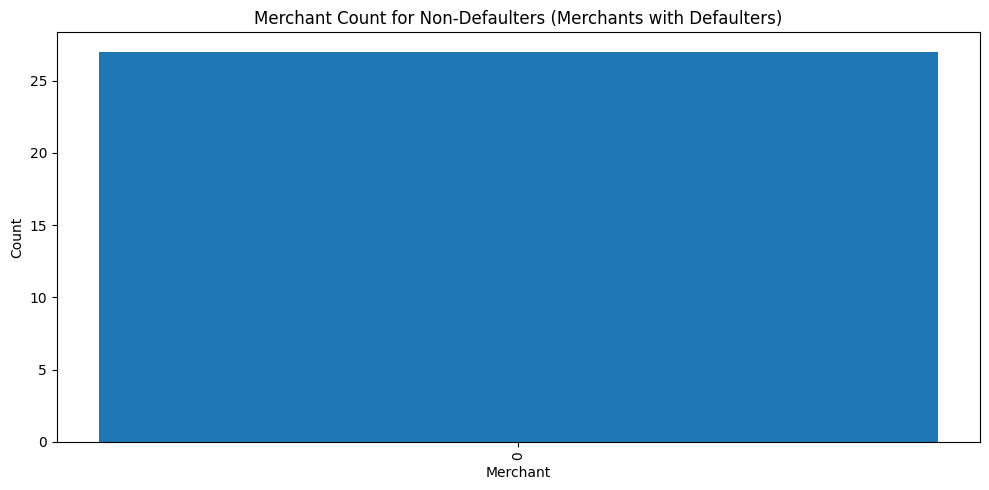

List of merchant1 for defaulters in filtered:

[167574 167345 166949 164845 164843 164838 163070 101441      0]


In [ ]:
import matplotlib.pyplot as plt
# Get the list of merchant1 for defaulters in filtered
defaulter_merchants = refine_filter[refine_filter['default_ind'] == 1].merchant2.unique()

# Count the occurrences of each defaulter merchant in non-defaulters
merchant_counts = refine_filter[refine_filter['default_ind'] == 0].merchant2.value_counts()

# Filter merchant counts to include only defaulter merchants
merchant_counts = merchant_counts[merchant_counts.index.isin(defaulter_merchants)]

# Plot the merchant counts
plt.figure(figsize=(10, 5))
plt.bar([str(i) for i in merchant_counts.index], merchant_counts.values)
plt.xlabel('Merchant')
plt.ylabel('Count')
plt.title('Merchant Count for Non-Defaulters (Merchants with Defaulters)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print('List of merchant1 for defaulters in filtered:')
print(defaulter_merchants)


In [ ]:
refine_filter

,unique_identifier,appl_month,prod_name,acq_channel,state_code,bureau_src,risk_score_1,bureau_score,limit,income,old_open_trd_ms,no_open_trd,no_trd,debt_cap,basic_max_trd_tnr,basic_no_trd,risk_score_2,trust_identity,risk_score_3,no_inq,risk_score_4,income_incons,bureau_mismatch,risk_score_5,risk_score_6,addr_mismatch,basic_old_open_trd_ms,addr_ds,dl_id,addr_changes,...,no_nid_to_addr,no_uid_to_addr,uid_addr_matches,uid_nid_matches,home_value,no_addr_to_nid,risk_score_7,no_trd_del,spend,payments,return_payments,attempt_txn,decline_txn,merchant1,merchant1_amt,merchant1_ten,merchant1_cat,merchant2,merchant2_amt,merchant2_ten,merchant2_cat,merchant3,merchant3_amt,merchant3_ten,merchant3_cat,risk_score_8,risk_score_9,risk_score_10,risk_score_11,default_ind
316,105747,Jan,Product 1,Channel 3,TX,No Bureau Hit,0.0,800,25000,110000,0,0,0,48060.333333,0,0,0.00293,Y,107,0,0,0.79333,2,96,29,NaN,0,-1,7,6,...,14,15,11,6,0,9,498,-1,6691.00,3295.0000,0,51,17,102539,3371.86,12,1,168146,832.00,9,1,117377,4.00,12,0,0.010,0.0001,0.052,0.2878,0
510,114290,Feb,Product 7,Channel 1,PA,No Bureau Hit,0.0,650,1000,60000,0,0,0,6170.900000,0,0,0.00240,Y,129,0,0,0.32631,0,99,99,NaN,0,-1,4,6,...,9,11,8,6,0,5,207,-1,253.09,225.0000,0,3,0,134663,90.00,12,1,167706,35.99,12,0,164201,1.10,12,0,0.001,0.0000,0.009,0.2787,0
641,131237,Apr,Product 1,Channel 3,IL,Bureau 2,0.3,800,9100,85000,251,9,25,46186.666667,0,0,0.00320,Y,67,1,0,0.60714,0,55,95,Y,251,4321,0,0,...,11,10,8,4,283148,5,479,22,5032.73,1358.8371,0,14,3,163070,4499.94,11,1,167574,424.79,12,0,137918,108.00,9,1,0.016,0.0006,0.018,0.3218,1
642,131250,Apr,Product 1,Channel 3,NC,Bureau 2,1.3,725,8000,55000,354,1,13,38000.000000,0,0,0.01931,Y,156,0,0,0.20357,0,62,15,Y,354,1026,6,6,...,22,22,5,5,821996,16,463,12,7697.00,2540.0100,0,74,16,163070,5249.93,11,1,167574,1121.46,12,0,164843,863.83,1,1,0.010,0.0006,0.106,0.3218,1
643,131246,Apr,Product 1,Channel 3,NJ,Bureau 2,0.3,800,25000,60000,254,3,13,40000.000000,0,0,0.00970,Y,48,0,0,0.24390,0,55,95,Y,254,9569,-1,0,...,6,9,0,0,176000,8,467,12,7462.00,2238.6000,0,10,3,163070,2249.97,11,1,167574,1455.48,12,0,164843,21.86,1,1,0.009,0.0003,0.132,0.3716,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59398,145548,May,Product 1,Channel 1,NC,No Bureau Hit,0.0,725,15000,140000,0,0,0,39334.620000,0,0,0.01278,Y,72,0,0,0.65454,0,96,55,NaN,0,-1,6,1,...,20,22,6,3,0,22,395,-1,0.00,0.0000,0,0,0,0,0.00,0,0,0,0.00,0,0,0,0.00,0,0,0.000,0.0000,0.000,0.2787,0
59416,149438,May,Product 1,Channel 1,NY,No Bureau Hit,0.0,775,20000,85000,0,0,0,40802.008667,0,0,0.00776,Y,36,0,0,0.49722,0,40,19,NaN,0,-1,2,2,...,17,16,4,2,0,19,122,-1,0.00,0.0000,0,0,0,0,0.00,0,0,0,0.00,0,0,0,0.00,0,0,0.000,0.0000,0.000,0.3941,0
59729,134151,Apr,Product 1,Channel 3,SC,Bureau 2,0.2,800,30000,75000,269,4,8,51595.000000,0,0,0.00982,Y,136,0,0,0.42482,0,62,19,N,90,6112,2,6,...,4,4,8,4,460000,4,472,5,0.00,0.0000,0,0,0,0,0.00,0,0,0,0.00,0,0,0,0.00,0,0,0.000,0.0000,0.000,0.3716,0
61012,150964,May,Product 1,Channel 1,CA,No Bureau Hit,0.0,700,16500,500000,0,0,0,246687.336667,0,0,0.00584,Y,68,0,0,1.81818,0,99,99,NaN,0,-1,4,6,...,16,18,5,3,0,20,304,-1,0.00,0.0000,0,0,0,0,0.00,0,0,0,0.00,0,0,0,0.00,0,0,0.000,0.0000,0.000,0.2878,0


# Credit Unilization

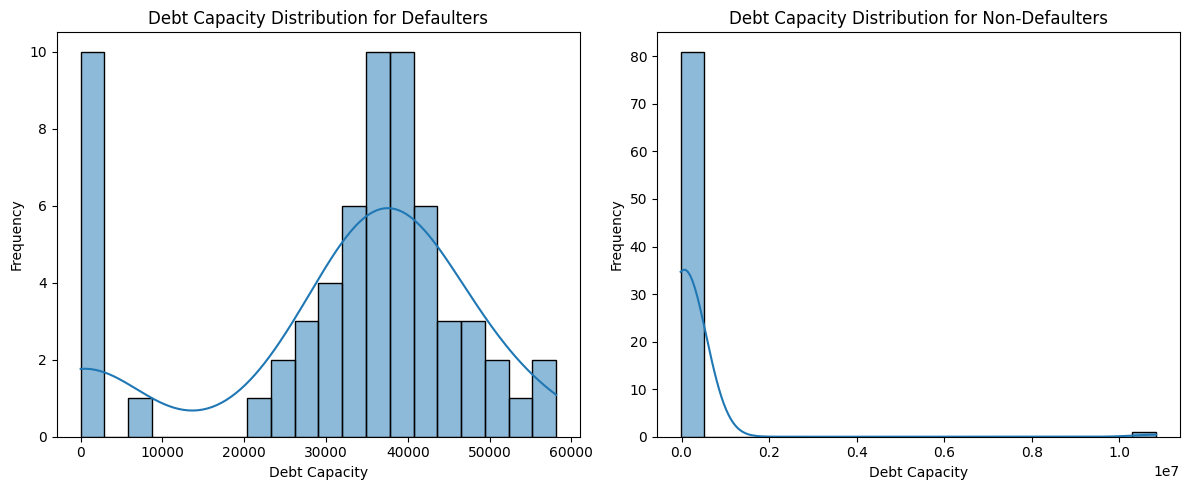

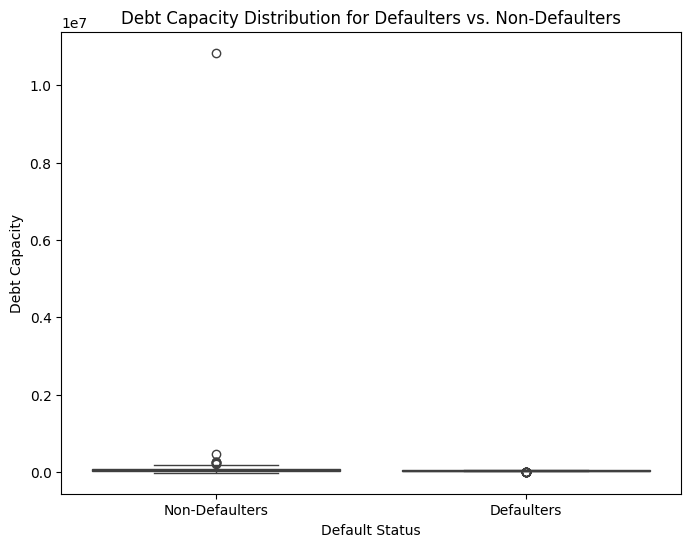

In [ ]:
# prompt: visualize debt_cap of refine_filter using different plots for defaulters and non defaulters

import matplotlib.pyplot as plt
defaulters = refine_filter[refine_filter['default_ind'] == 1]
non_defaulters = refine_filter[refine_filter['default_ind'] == 0]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for defaulters
sns.histplot(defaulters['debt_cap'], kde=True, ax=axes[0], bins=20)
axes[0].set_title('Debt Capacity Distribution for Defaulters')
axes[0].set_xlabel('Debt Capacity')
axes[0].set_ylabel('Frequency')

# Plot for non-defaulters
sns.histplot(non_defaulters['debt_cap'], kde=True, ax=axes[1], bins=20)
axes[1].set_title('Debt Capacity Distribution for Non-Defaulters')
axes[1].set_xlabel('Debt Capacity')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# Create box plots
plt.figure(figsize=(8, 6))
sns.boxplot(x='default_ind', y='debt_cap', data=refine_filter)
plt.title('Debt Capacity Distribution for Defaulters vs. Non-Defaulters')
plt.xlabel('Default Status')
plt.ylabel('Debt Capacity')
plt.xticks([0, 1], ['Non-Defaulters', 'Defaulters'])
plt.show()


In [ ]:
refine_filter[(refine_filter['acq_channel'] == 'Channel 3') ].shape

(90, 61)

In [ ]:
defaulters['debt_cap'].max()

58138.6

In [ ]:
# prompt: filter out rows that lie outside 1 SD of debt_cap and limit colmns in refine_filter

mean = refine_filter['debt_cap'].mean()
std = refine_filter['debt_cap'].std()

refine_filter = refine_filter[(abs(refine_filter['debt_cap'] - mean) <= 3*std)]
refine_filter.shape


(145, 61)

In [ ]:
# prompt: create credit_utilization = debt_cap/limit in refine_filter data. Remove outliers

refine_filter['credit_utilization'] = refine_filter['debt_cap']/refine_filter['limit']

# Remove outliers
mean = refine_filter['credit_utilization'].mean()
std = refine_filter['credit_utilization'].std()

filter_credit = refine_filter[abs(refine_filter['credit_utilization'] - mean) <std]


<ipython-input-87-1cb1bb6baf06>:3: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  refine_filter['credit_utilization'] = refine_filter['debt_cap']/refine_filter['limit']


In [ ]:
refine_filter['credit_utilization'].describe()

,credit_utilization
count,145.000000
mean,5.851917
std,9.034214
min,-10.852441
25%,1.585101
50%,2.964631
75%,6.348324
max,52.117833


In [ ]:
# prompt: count defaulters and non_defaluters

defaulters = filter_credit[filter_credit['default_ind'] == 1]
non_defaulters = filter_credit[filter_credit['default_ind'] == 0]

print("Defaulters:", defaulters.shape[0])
print("Non-Defaulters:", non_defaulters.shape[0])


Defaulters: 63

Non-Defaulters: 66


In [ ]:
refine_filter['credit_utilization'] = refine_filter['debt_cap'] /( refine_filter['spend'] +1)
refine_filter['credit_utilization'].describe()

<ipython-input-90-b62af1772357>:1: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  refine_filter['credit_utilization'] = refine_filter['debt_cap'] /( refine_filter['spend'] +1)


,credit_utilization
count,145.000000
mean,13828.210239
std,49744.561426
min,-3037.289500
25%,3.087287
50%,7.854066
75%,51.645213
max,454078.116667


Credit Utilization Statistics for Defaulters:

count       64.000000

mean      5251.029885

std      12553.561544

min          0.000000

25%          2.575457

50%          5.148061

75%         11.820852

max      43000.000000

Name: credit_utilization, dtype: float64



Credit Utilization Statistics for Non-Defaulters:

count        81.000000

mean      20605.241630

std       64997.524590

min       -3037.289500

25%           4.060538

50%          13.831959

75%         231.067431

max      454078.116667

Name: credit_utilization, dtype: float64


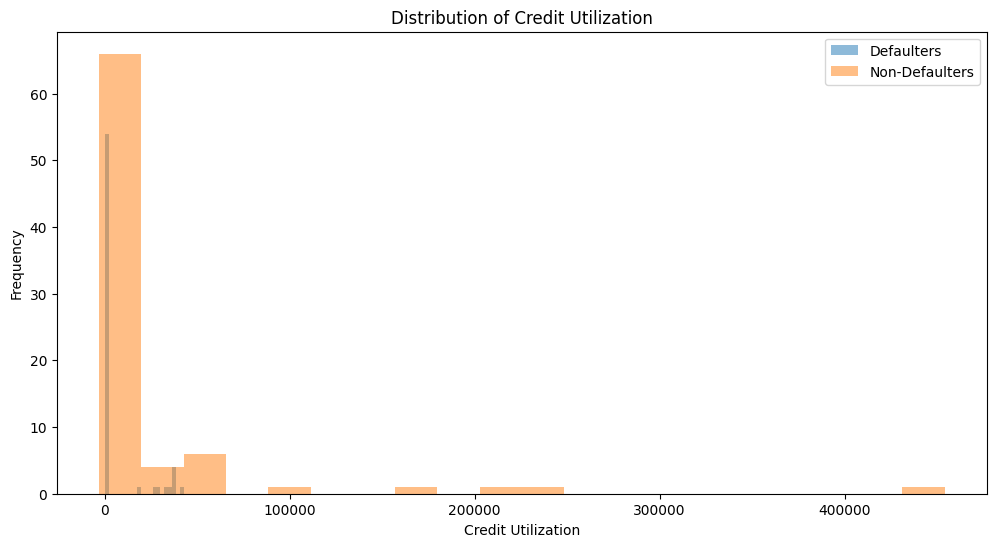

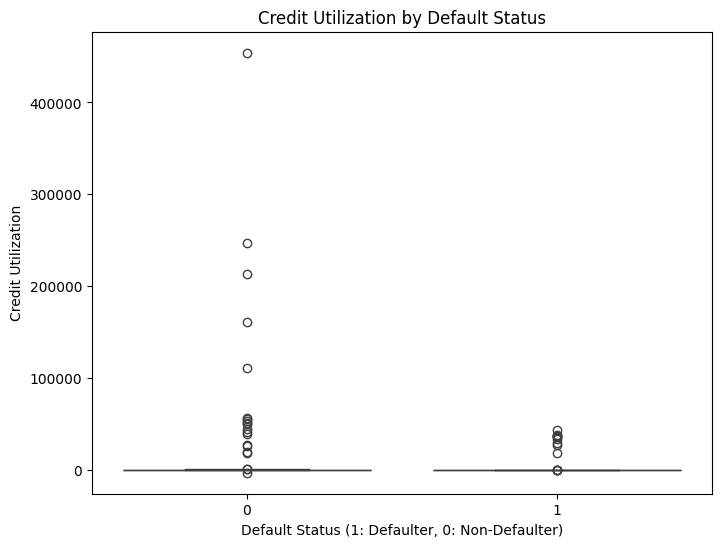

In [ ]:
# prompt: generate statistics and visuals for credit_utilization in refine filter data for defaulters and nondefauters

import matplotlib.pyplot as plt
defaulters = refine_filter[refine_filter['default_ind'] == 1]
non_defaulters = refine_filter[refine_filter['default_ind'] == 0]

# Calculate statistics for credit utilization
print("Credit Utilization Statistics for Defaulters:")
print(defaulters['credit_utilization'].describe())

print("\nCredit Utilization Statistics for Non-Defaulters:")
print(non_defaulters['credit_utilization'].describe())

# Create histograms for credit utilization
plt.figure(figsize=(12, 6))
plt.hist(defaulters['credit_utilization'], bins=20, alpha=0.5, label='Defaulters')
plt.hist(non_defaulters['credit_utilization'], bins=20, alpha=0.5, label='Non-Defaulters')
plt.xlabel('Credit Utilization')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Utilization')
plt.legend()
plt.show()

# Create box plots for credit utilization
plt.figure(figsize=(8, 6))
sns.boxplot(x='default_ind', y='credit_utilization', data=refine_filter)
plt.xlabel('Default Status (1: Defaulter, 0: Non-Defaulter)')
plt.ylabel('Credit Utilization')
plt.title('Credit Utilization by Default Status')
plt.show()


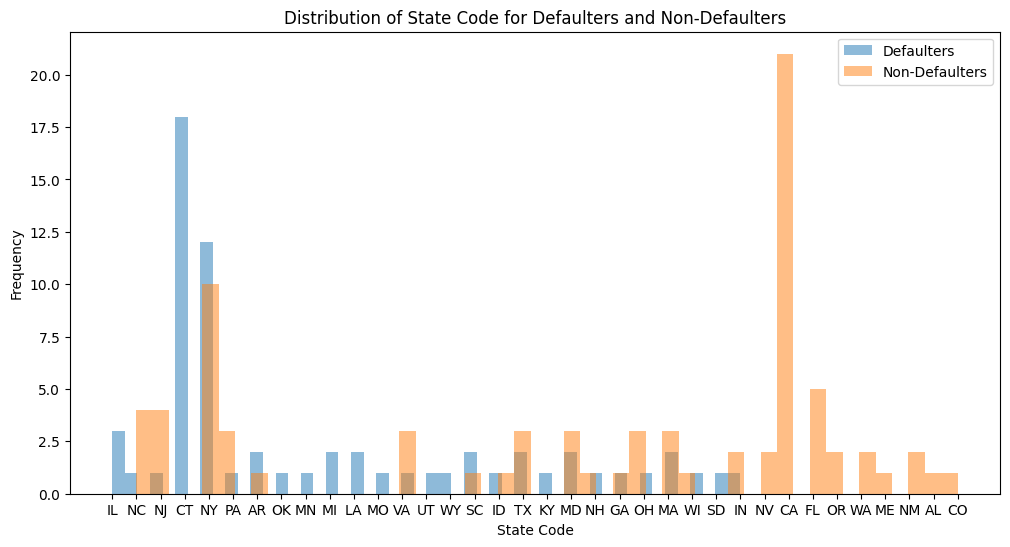

In [ ]:
# prompt: plot state_code distribution of refine_filter for defaulters and non_defaulters

import matplotlib.pyplot as plt
defaulters = refine_filter[refine_filter['default_ind'] == 1]
non_defaulters = refine_filter[refine_filter['default_ind'] == 0]

plt.figure(figsize=(12, 6))
plt.hist(defaulters['state_code'], bins=50, alpha=0.5, label='Defaulters')
plt.hist(non_defaulters['state_code'], bins=50, alpha=0.5, label='Non-Defaulters')
plt.xlabel('State Code')
plt.ylabel('Frequency')
plt.title('Distribution of State Code for Defaulters and Non-Defaulters')
plt.legend(loc='upper right')
plt.show()


In [ ]:
non_defaulters['state_code'].isin(['NV', 'CA', 'FL', 'OR', 'WA', 'ME', 'NM', 'AL', 'CO']).sum()

37

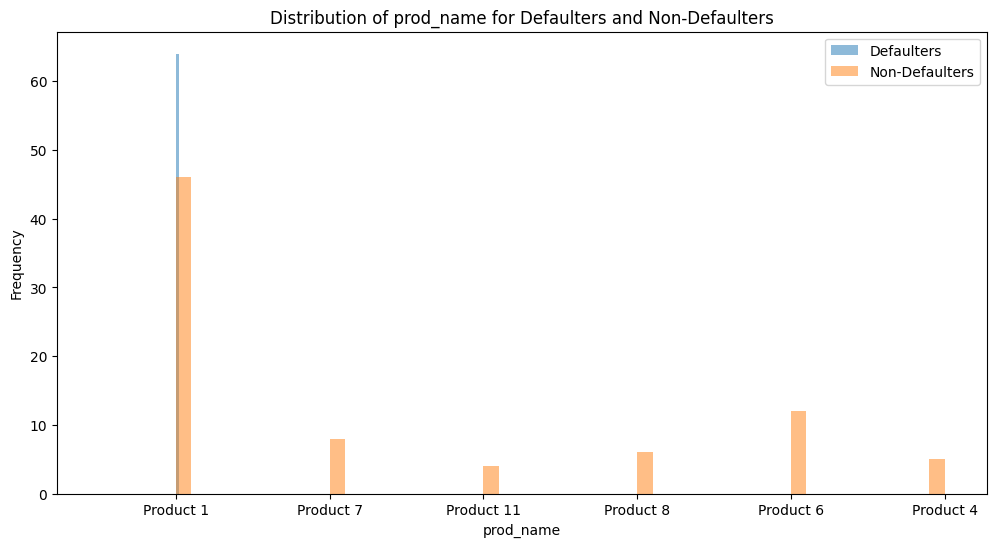

In [ ]:
# prompt: plot prod_name distribution of refine_filter for defaulters and non_defaulters

import matplotlib.pyplot as plt
defaulters = refine_filter[refine_filter['default_ind'] == 1]
non_defaulters = refine_filter[refine_filter['default_ind'] == 0]

plt.figure(figsize=(12, 6))
plt.hist(defaulters['prod_name'], bins=50, alpha=0.5, label='Defaulters')
plt.hist(non_defaulters['prod_name'], bins=50, alpha=0.5, label='Non-Defaulters')
plt.xlabel('prod_name')
plt.ylabel('Frequency')
plt.title('Distribution of prod_name for Defaulters and Non-Defaulters')
plt.legend(loc='upper right')
plt.show()


In [ ]:
non_defaulters['prod_name'].value_counts()

,count
prod_name,
Product 1,46
Product 6,12
Product 7,8
Product 8,6
Product 4,5
Product 11,4


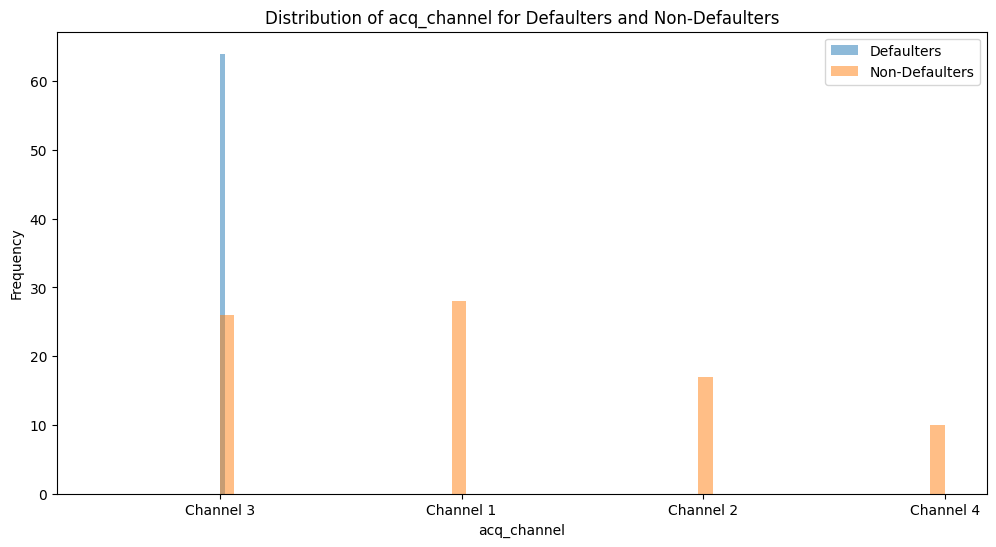

In [ ]:
# prompt: plot prod_name distribution of acq_channel	defaulters and non_defaulters

import matplotlib.pyplot as plt
defaulters = refine_filter[refine_filter['default_ind'] == 1]
non_defaulters = refine_filter[refine_filter['default_ind'] == 0]

plt.figure(figsize=(12, 6))
plt.hist(defaulters['acq_channel'], bins=50, alpha=0.5, label='Defaulters')
plt.hist(non_defaulters['acq_channel'], bins=50, alpha=0.5, label='Non-Defaulters')
plt.xlabel('acq_channel')
plt.ylabel('Frequency')
plt.title('Distribution of acq_channel for Defaulters and Non-Defaulters')
plt.legend(loc='upper right')
plt.show()


In [ ]:
non_defaulters.acq_channel.value_counts()

,count
acq_channel,
Channel 1,28
Channel 3,26
Channel 2,17
Channel 4,10


In [ ]:
# prompt: give number of non defaulters with acq_channel == 'Channel 3' and prod_name == 'Product 1'

non_defaulters[(non_defaulters['acq_channel'] == 'Channel 3') & (non_defaulters['prod_name'] == 'Product 1')].shape[0]


19

In [ ]:
# prompt: give number of defaulters with acq_channel == 'Channel 3' and prod_name == 'Product 1'

defaulters[(defaulters['acq_channel'] == 'Channel 3') & (defaulters['prod_name'] == 'Product 1')].shape[0]


64

In [ ]:
filter4 = refine_filter[(refine_filter['acq_channel'] == 'Channel 3') ]
filter4.shape

(90, 62)

In [ ]:
((filter4['merchant1'] == 0) & (filter4['default_ind'] == 1) ).sum()

9

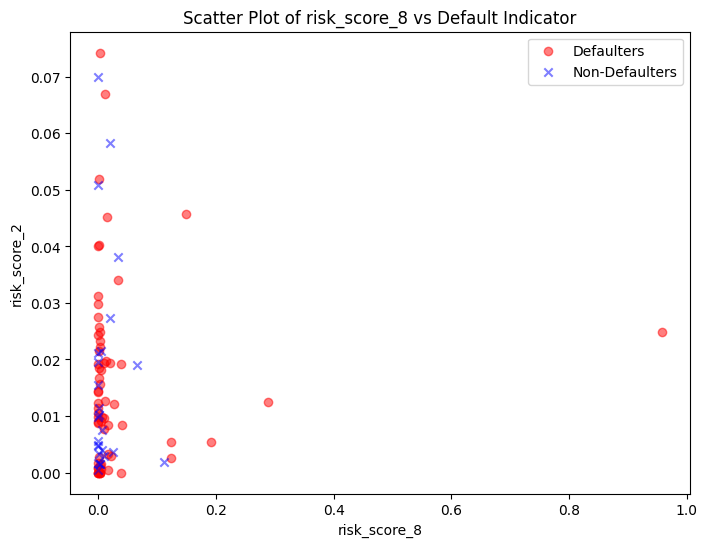

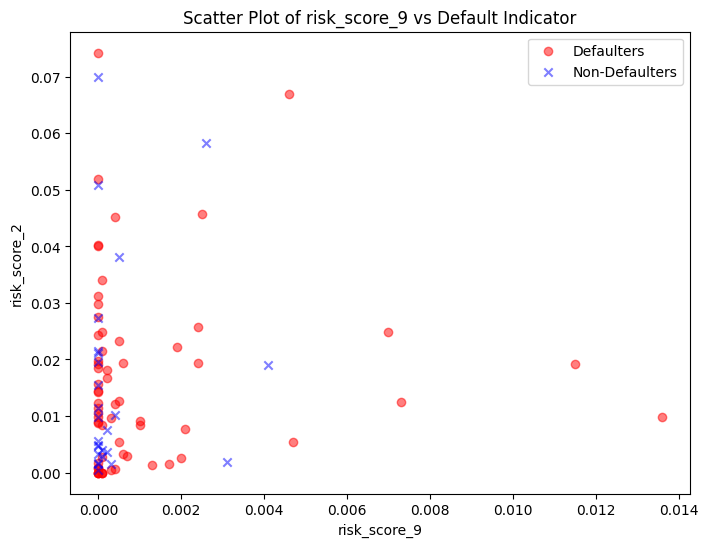

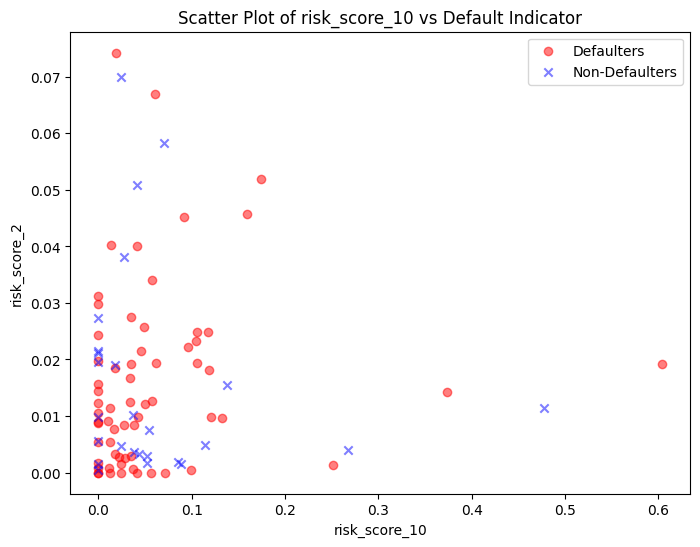

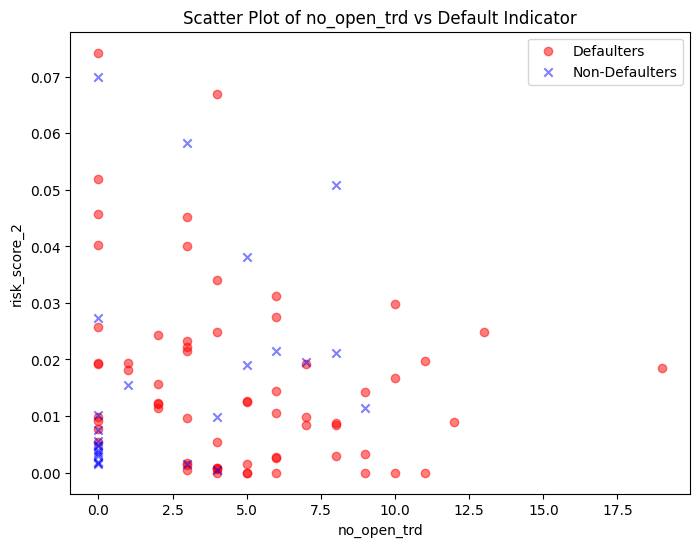

In [ ]:
# prompt: plot various scatter plot of filter4 data based on defaulters and non-defaulters

import matplotlib.pyplot as plt
defaulters = filter4[filter4['default_ind'] == 1]
non_defaulters = filter4[filter4['default_ind'] == 0]

# Create scatter plots for different columns
for col in ['risk_score_8', 'risk_score_9', 'risk_score_10', 'no_open_trd']:
  plt.figure(figsize=(8, 6))
  plt.scatter(defaulters[col], defaulters['risk_score_2'], color='red', label='Defaulters', marker='o', alpha=0.5)
  plt.scatter(non_defaulters[col], non_defaulters['risk_score_2'], color='blue', label='Non-Defaulters', marker='x', alpha=0.5)
  plt.xlabel(col)
  plt.ylabel('risk_score_2')
  plt.title(f'Scatter Plot of {col} vs Default Indicator')
  plt.legend()
  plt.show()


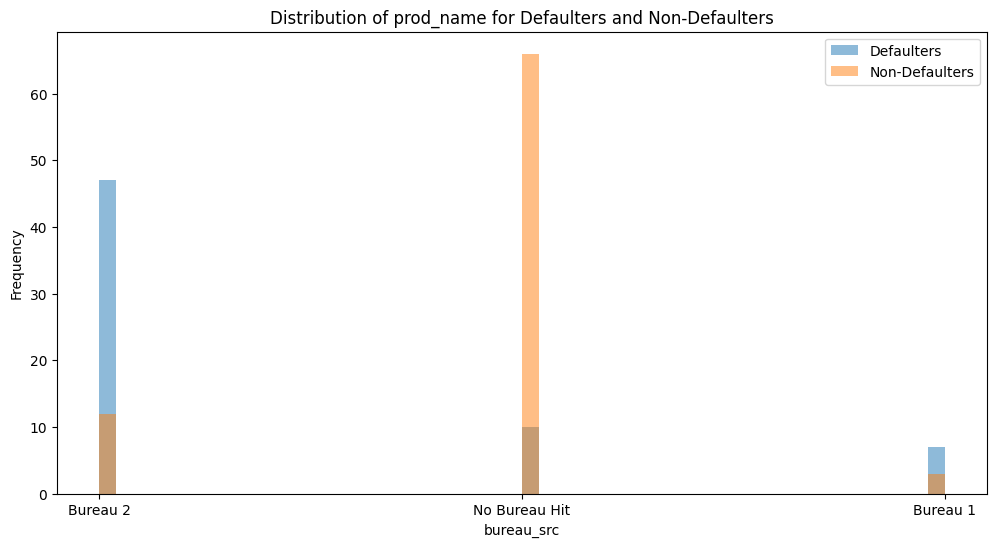

In [ ]:
# prompt:  plot prod_name distribution of bureau_src defaulters and non_defaulters

import matplotlib.pyplot as plt
defaulters = refine_filter[refine_filter['default_ind'] == 1]
non_defaulters = refine_filter[refine_filter['default_ind'] == 0]

plt.figure(figsize=(12, 6))
plt.hist(defaulters['bureau_src'], bins=50, alpha=0.5, label='Defaulters')
plt.hist(non_defaulters['bureau_src'], bins=50, alpha=0.5, label='Non-Defaulters')
plt.xlabel('bureau_src')
plt.ylabel('Frequency')
plt.title('Distribution of prod_name for Defaulters and Non-Defaulters')
plt.legend(loc='upper right')
plt.show()


In [ ]:
non_defaulters.bureau_src.value_counts()

,count
bureau_src,
No Bureau Hit,66
Bureau 2,12
Bureau 1,3


In [ ]:
defaulters.bureau_src.value_counts()

,count
bureau_src,
Bureau 2,47
No Bureau Hit,10
Bureau 1,7


In [ ]:
defaulters.trust_identity.value_counts()

,count
trust_identity,
Y,52
N,12


In [ ]:
def filter(df_out):
  mean_7 = df['risk_score_7'].mean()
  std_7 = df['risk_score_7'].std()
  df_new = df_out[(abs(df_out['risk_score_7'] - mean_7) >= 1.3*std_7)]
  return df_new

filtered7 = filter(refine_filter)
filtered7.shape

(94, 62)

In [ ]:
filtered7[filtered7['default_ind'] == 1].shape

(63, 62)

In [ ]:
filter7_prod = filtered7[(filtered7['acq_channel'] == 'Channel 3') & (filtered7['prod_name'] == 'Product 1')]
filter7_prod.shape

(77, 62)

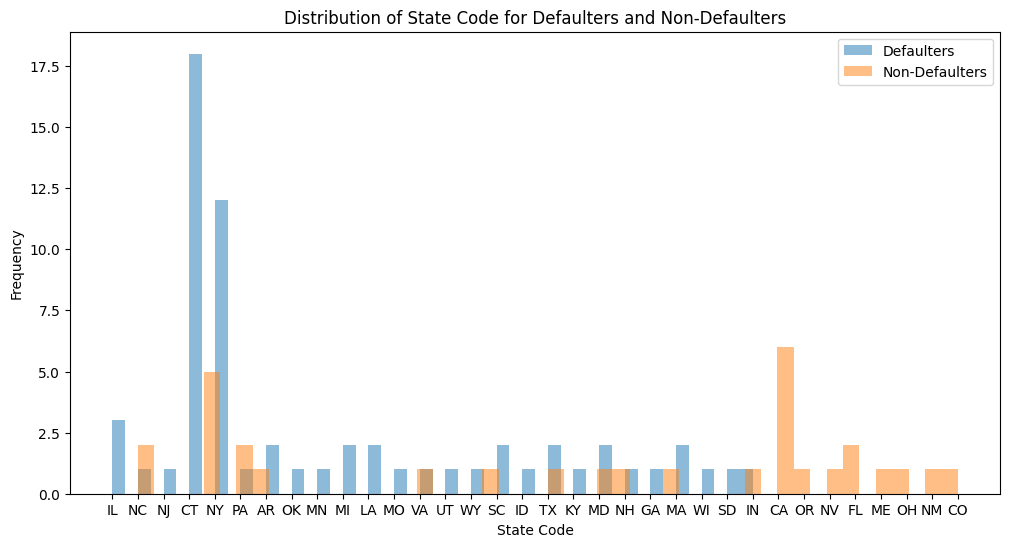

In [ ]:
# prompt: plot state_code distribution of filtered7 for defaulters and non_defaulters

import matplotlib.pyplot as plt
defaulters = filtered7[filtered7['default_ind'] == 1]
non_defaulters = filtered7[filtered7['default_ind'] == 0]

plt.figure(figsize=(12, 6))
plt.hist(defaulters['state_code'], bins=50, alpha=0.5, label='Defaulters')
plt.hist(non_defaulters['state_code'], bins=50, alpha=0.5, label='Non-Defaulters')
plt.xlabel('State Code')
plt.ylabel('Frequency')
plt.title('Distribution of State Code for Defaulters and Non-Defaulters')
plt.legend(loc='upper right')
plt.show()


In [ ]:
non_defaulters['state_code'].isin(['NV', 'CA', 'FL', 'OR', 'WA', 'ME', 'NM', 'AL', 'CO']).sum()

13

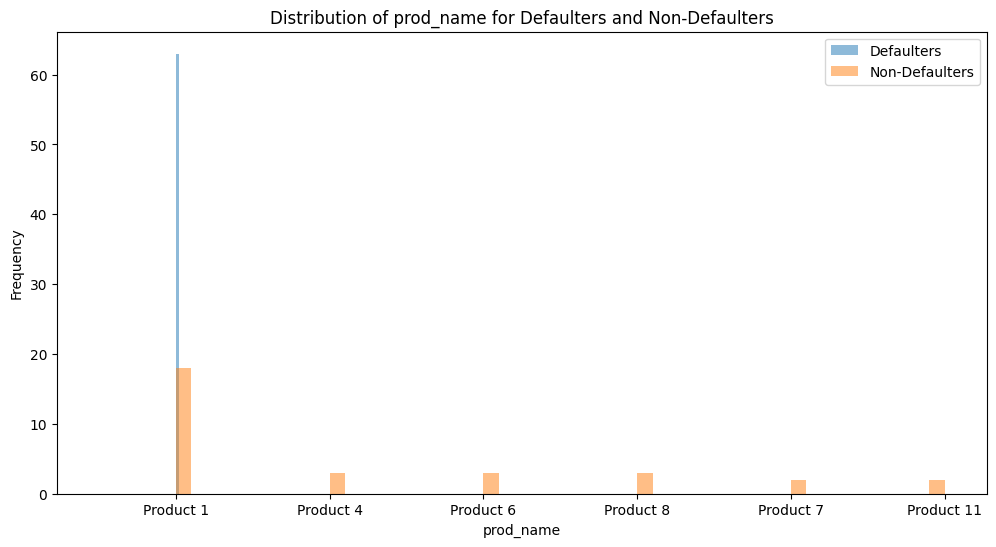

In [ ]:
# prompt: plot prod_name distribution of filtered7 for defaulters and non_defaulters

import matplotlib.pyplot as plt
defaulters = filtered7[filtered7['default_ind'] == 1]
non_defaulters = filtered7[filtered7['default_ind'] == 0]

plt.figure(figsize=(12, 6))
plt.hist(defaulters['prod_name'], bins=50, alpha=0.5, label='Defaulters')
plt.hist(non_defaulters['prod_name'], bins=50, alpha=0.5, label='Non-Defaulters')
plt.xlabel('prod_name')
plt.ylabel('Frequency')
plt.title('Distribution of prod_name for Defaulters and Non-Defaulters')
plt.legend(loc='upper right')
plt.show()


In [ ]:
non_defaulters.prod_name.value_counts()

,count
prod_name,
Product 1,18
Product 4,3
Product 6,3
Product 8,3
Product 7,2
Product 11,2


Statistics for basic_old_open_trd_ms:

count    145.000000

mean     119.841379

std      147.123563

min       -1.000000

25%        0.000000

50%        0.000000

75%      219.000000

max      604.000000

Name: basic_old_open_trd_ms, dtype: float64


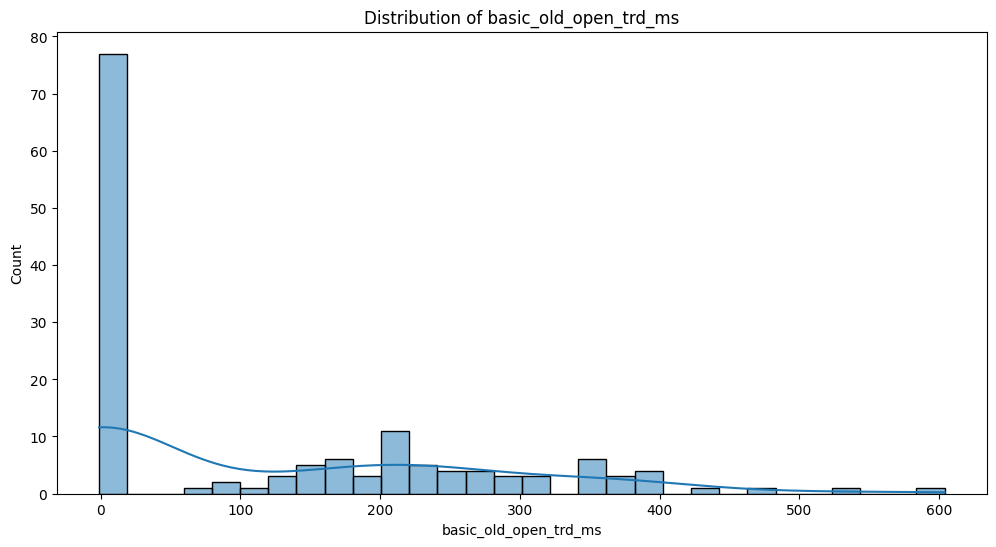



Statistics for basic_old_open_trd_ms (Defaulters):

count     64.000000

mean     204.625000

std      131.652079

min       -1.000000

25%      139.750000

50%      212.000000

75%      294.250000

max      538.000000

Name: basic_old_open_trd_ms, dtype: float64



Statistics for basic_old_open_trd_ms (Non-Defaulters):

count     81.000000

mean      52.851852

std      122.548573

min        0.000000

25%        0.000000

50%        0.000000

75%        0.000000

max      604.000000

Name: basic_old_open_trd_ms, dtype: float64


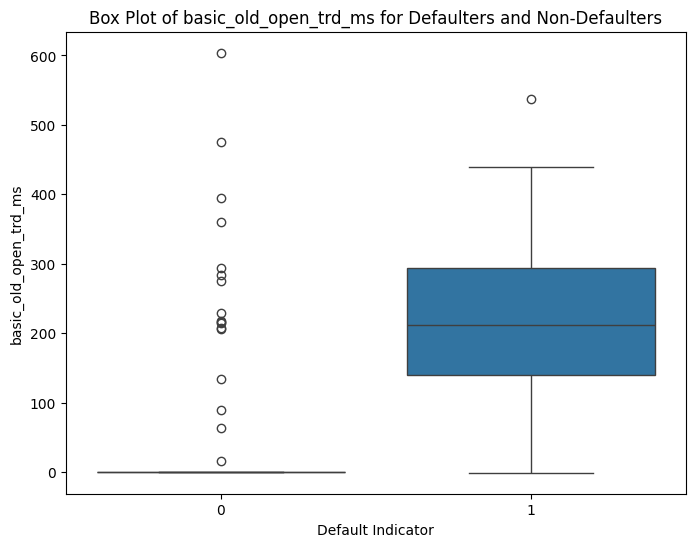

In [ ]:
# prompt: analysize the colum basic_old_open_trd_ms of refined_filter

import matplotlib.pyplot as plt
# Calculate and print some basic statistics
stats = refine_filter['basic_old_open_trd_ms'].describe()
print("Statistics for basic_old_open_trd_ms:")
print(stats)

# Create a histogram and kernel density estimation (KDE) plot
plt.figure(figsize=(12, 6))
sns.histplot(data=refine_filter, x='basic_old_open_trd_ms', kde=True, bins=30)
plt.title('Distribution of basic_old_open_trd_ms')
plt.xlabel('basic_old_open_trd_ms')
plt.ylabel('Count')
plt.show()

# Analyze the column for defaulters and non-defaulters separately
defaulters = refine_filter[refine_filter['default_ind'] == 1]
non_defaulters = refine_filter[refine_filter['default_ind'] == 0]

# Calculate and print statistics for defaulters
stats_defaulters = defaulters['basic_old_open_trd_ms'].describe()
print("\nStatistics for basic_old_open_trd_ms (Defaulters):")
print(stats_defaulters)

# Calculate and print statistics for non-defaulters
stats_non_defaulters = non_defaulters['basic_old_open_trd_ms'].describe()
print("\nStatistics for basic_old_open_trd_ms (Non-Defaulters):")
print(stats_non_defaulters)

# Create box plots for defaulters and non-defaulters
plt.figure(figsize=(8, 6))
sns.boxplot(x='default_ind', y='basic_old_open_trd_ms', data=refine_filter)
plt.title('Box Plot of basic_old_open_trd_ms for Defaulters and Non-Defaulters')
plt.xlabel('Default Indicator')
plt.ylabel('basic_old_open_trd_ms')
plt.show()


Statistics for addr_ds:

count      145.000000

mean      3572.924138

std       4227.905768

min         -1.000000

25%         -1.000000

50%       1077.000000

75%       7355.000000

max      13235.000000

Name: addr_ds, dtype: float64


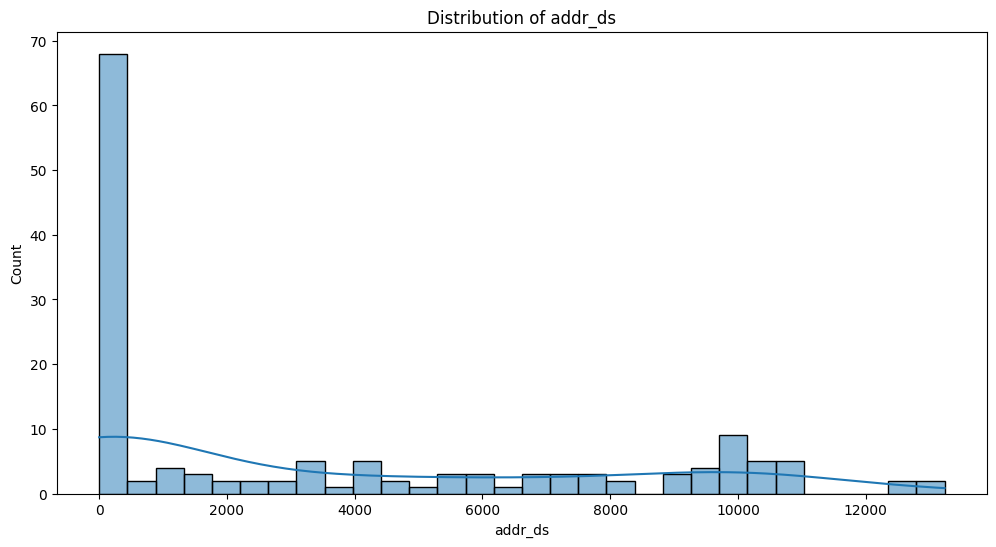



Statistics for addr_ds (Defaulters):

count       64.000000

mean      6336.468750

std       3769.077265

min        115.000000

25%       2826.500000

50%       6909.500000

75%       9949.250000

max      13235.000000

Name: addr_ds, dtype: float64



Statistics for addr_ds (Non-Defaulters):

count       81.000000

mean      1389.382716

std       3170.325238

min         -1.000000

25%         -1.000000

50%         -1.000000

75%         -1.000000

max      13084.000000

Name: addr_ds, dtype: float64


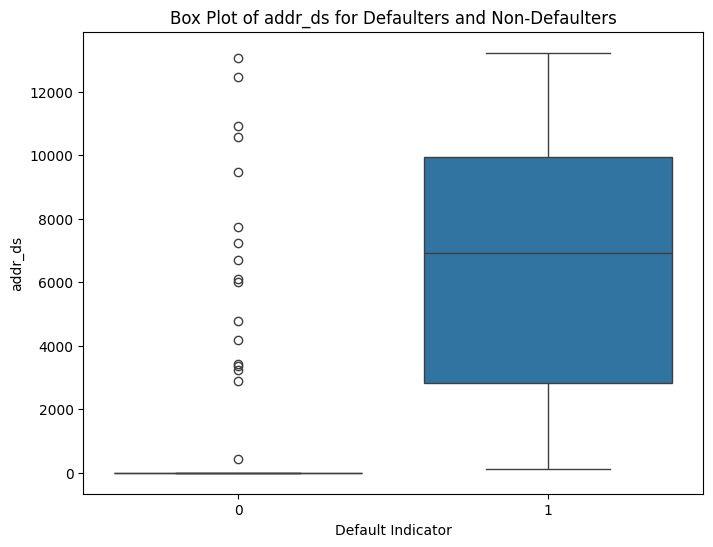

In [ ]:
# prompt: analysize the colum addr_ds of refined_filter

import matplotlib.pyplot as plt
# Calculate and print some basic statistics
stats = refine_filter['addr_ds'].describe()
print("Statistics for addr_ds:")
print(stats)

# Create a histogram and kernel density estimation (KDE) plot
plt.figure(figsize=(12, 6))
sns.histplot(data=refine_filter, x='addr_ds', kde=True, bins=30)
plt.title('Distribution of addr_ds')
plt.xlabel('addr_ds')
plt.ylabel('Count')
plt.show()

# Analyze the column for defaulters and non-defaulters separately
defaulters = refine_filter[refine_filter['default_ind'] == 1]
non_defaulters = refine_filter[refine_filter['default_ind'] == 0]

# Calculate and print statistics for defaulters
stats_defaulters = defaulters['addr_ds'].describe()
print("\nStatistics for addr_ds (Defaulters):")
print(stats_defaulters)

# Calculate and print statistics for non-defaulters
stats_non_defaulters = non_defaulters['addr_ds'].describe()
print("\nStatistics for addr_ds (Non-Defaulters):")
print(stats_non_defaulters)

# Create box plots for defaulters and non-defaulters
plt.figure(figsize=(8, 6))
sns.boxplot(x='default_ind', y='addr_ds', data=refine_filter)
plt.title('Box Plot of addr_ds for Defaulters and Non-Defaulters')
plt.xlabel('Default Indicator')
plt.ylabel('addr_ds')
plt.show()


In [ ]:
(refine_filter['basic_old_open_trd_ms'] >= 90).sum()

67

In [ ]:
(refine_filter[(refine_filter['default_ind'] == 1)]['basic_old_open_trd_ms'] >= 90).sum()

52

Statistics for attempt_txn:

count    145.000000

mean      30.289655

std       53.047923

min        0.000000

25%        1.000000

50%       10.000000

75%       31.000000

max      350.000000

Name: attempt_txn, dtype: float64



Statistics for decline_txn:

count    145.000000

mean       1.910345

std        3.449874

min        0.000000

25%        0.000000

50%        0.000000

75%        3.000000

max       19.000000

Name: decline_txn, dtype: float64


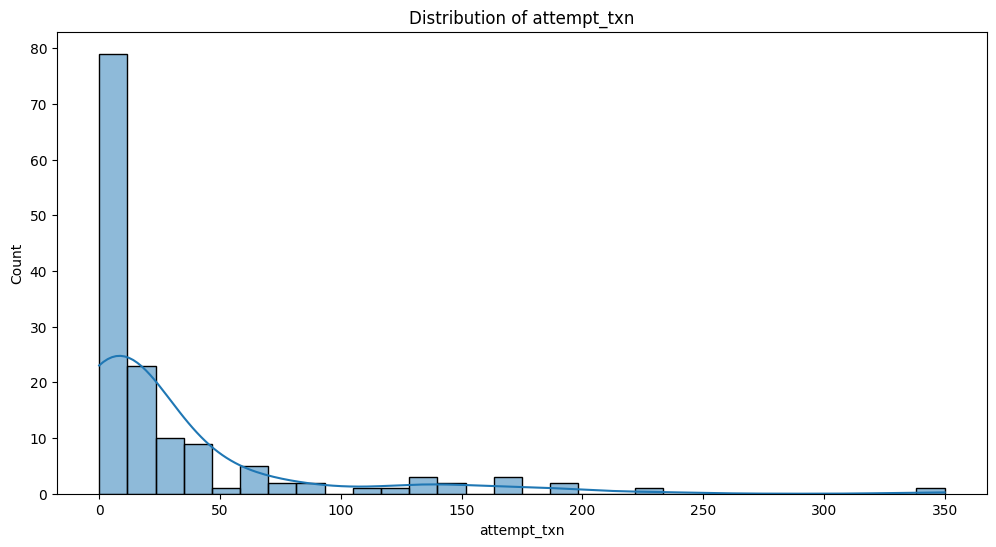

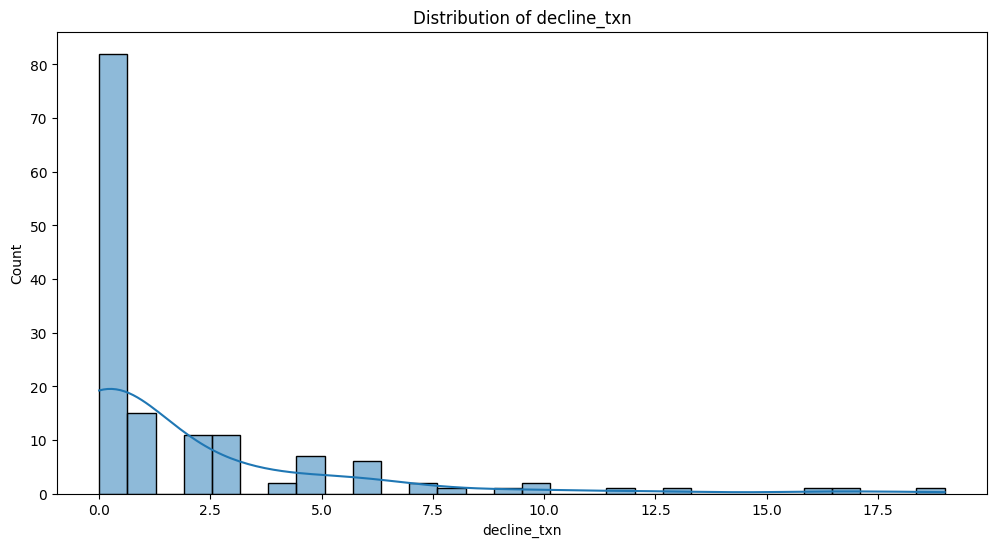



Statistics for attempt_txn (Defaulters):

count     64.000000

mean      13.984375

std       20.700811

min        0.000000

25%        2.750000

50%        9.500000

75%       17.000000

max      142.000000

Name: attempt_txn, dtype: float64



Statistics for attempt_txn (Non-Defaulters):

count     81.000000

mean      43.172840

std       65.932881

min        0.000000

25%        1.000000

50%       10.000000

75%       60.000000

max      350.000000

Name: attempt_txn, dtype: float64



Statistics for decline_txn (Defaulters):

count    64.000000

mean      2.515625

std       3.482346

min       0.000000

25%       0.000000

50%       1.000000

75%       3.250000

max      16.000000

Name: decline_txn, dtype: float64



Statistics for decline_txn (Non-Defaulters):

count    81.000000

mean      1.432099

std       3.368747

min       0.000000

25%       0.000000

50%       0.000000

75%       1.000000

max      19.000000

Name: decline_txn, dtype: float64


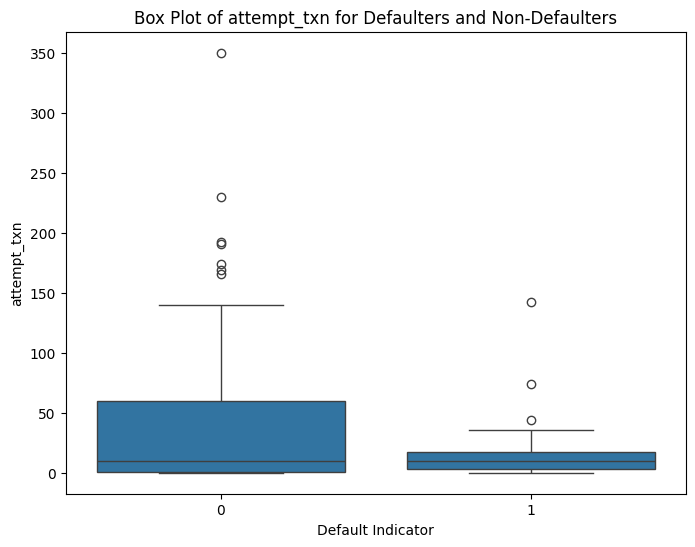

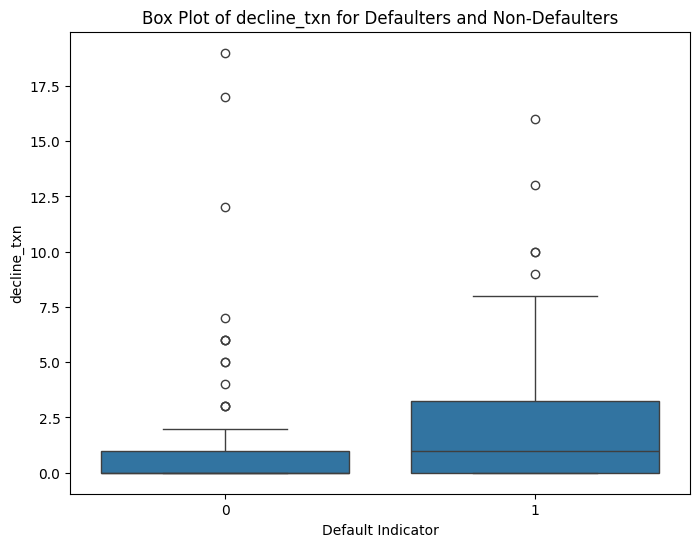

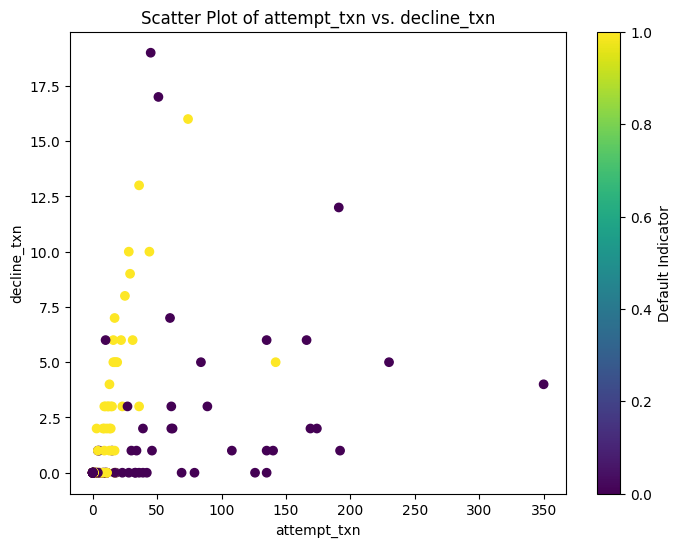

In [ ]:
# prompt: analysize the colum attempt_txn and decline_txn of refined_filter

import matplotlib.pyplot as plt
# Calculate and print some basic statistics for attempt_txn
stats_attempt = refine_filter['attempt_txn'].describe()
print("Statistics for attempt_txn:")
print(stats_attempt)

# Calculate and print some basic statistics for decline_txn
stats_decline = refine_filter['decline_txn'].describe()
print("\nStatistics for decline_txn:")
print(stats_decline)

# Create a histogram and kernel density estimation (KDE) plot for attempt_txn
plt.figure(figsize=(12, 6))
sns.histplot(data=refine_filter, x='attempt_txn', kde=True, bins=30)
plt.title('Distribution of attempt_txn')
plt.xlabel('attempt_txn')
plt.ylabel('Count')
plt.show()

# Create a histogram and kernel density estimation (KDE) plot for decline_txn
plt.figure(figsize=(12, 6))
sns.histplot(data=refine_filter, x='decline_txn', kde=True, bins=30)
plt.title('Distribution of decline_txn')
plt.xlabel('decline_txn')
plt.ylabel('Count')
plt.show()

# Analyze attempt_txn and decline_txn for defaulters and non-defaulters separately
defaulters = refine_filter[refine_filter['default_ind'] == 1]
non_defaulters = refine_filter[refine_filter['default_ind'] == 0]

# Calculate and print statistics for attempt_txn for defaulters
stats_attempt_defaulters = defaulters['attempt_txn'].describe()
print("\nStatistics for attempt_txn (Defaulters):")
print(stats_attempt_defaulters)

# Calculate and print statistics for attempt_txn for non-defaulters
stats_attempt_non_defaulters = non_defaulters['attempt_txn'].describe()
print("\nStatistics for attempt_txn (Non-Defaulters):")
print(stats_attempt_non_defaulters)

# Calculate and print statistics for decline_txn for defaulters
stats_decline_defaulters = defaulters['decline_txn'].describe()
print("\nStatistics for decline_txn (Defaulters):")
print(stats_decline_defaulters)

# Calculate and print statistics for decline_txn for non-defaulters
stats_decline_non_defaulters = non_defaulters['decline_txn'].describe()
print("\nStatistics for decline_txn (Non-Defaulters):")
print(stats_decline_non_defaulters)

# Create box plots for attempt_txn for defaulters and non-defaulters
plt.figure(figsize=(8, 6))
sns.boxplot(x='default_ind', y='attempt_txn', data=refine_filter)
plt.title('Box Plot of attempt_txn for Defaulters and Non-Defaulters')
plt.xlabel('Default Indicator')
plt.ylabel('attempt_txn')
plt.show()

# Create box plots for decline_txn for defaulters and non-defaulters
plt.figure(figsize=(8, 6))
sns.boxplot(x='default_ind', y='decline_txn', data=refine_filter)
plt.title('Box Plot of decline_txn for Defaulters and Non-Defaulters')
plt.xlabel('Default Indicator')
plt.ylabel('decline_txn')
plt.show()

# Create a scatter plot to visualize the relationship between attempt_txn and decline_txn
plt.figure(figsize=(8, 6))
plt.scatter(refine_filter['attempt_txn'], refine_filter['decline_txn'], c=refine_filter['default_ind'], cmap='viridis')
plt.title('Scatter Plot of attempt_txn vs. decline_txn')
plt.xlabel('attempt_txn')
plt.ylabel('decline_txn')
plt.colorbar(label='Default Indicator')
plt.show()


<ipython-input-119-daa62b13347e>:5: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  refine_filter['decline_attempt_ratio'] = refine_filter['decline_txn'] / refine_filter['attempt_txn']




Statistics for decline_attempt_ratio (Defaulters):

count    55.000000

mean      0.154144

std       0.152441

min       0.000000

25%       0.000000

50%       0.142857

75%       0.267943

max       0.666667

Name: decline_attempt_ratio, dtype: float64



Statistics for decline_attempt_ratio (Non-Defaulters):

count    64.000000

mean      0.041752

std       0.104906

min       0.000000

25%       0.000000

50%       0.000000

75%       0.032923

max       0.600000

Name: decline_attempt_ratio, dtype: float64


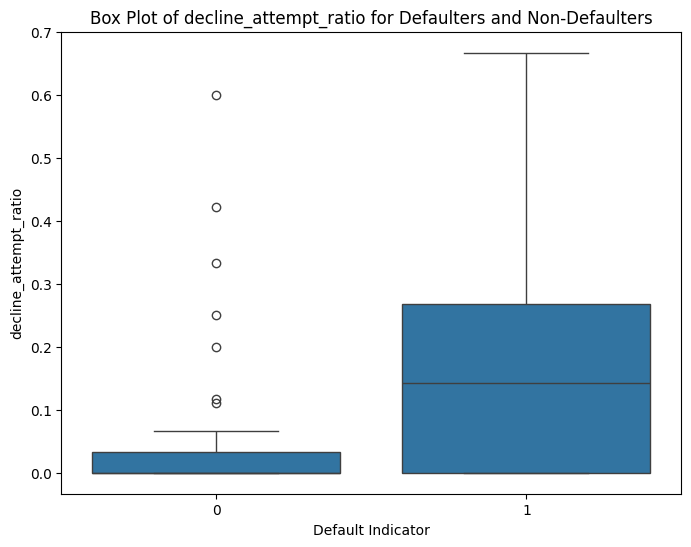

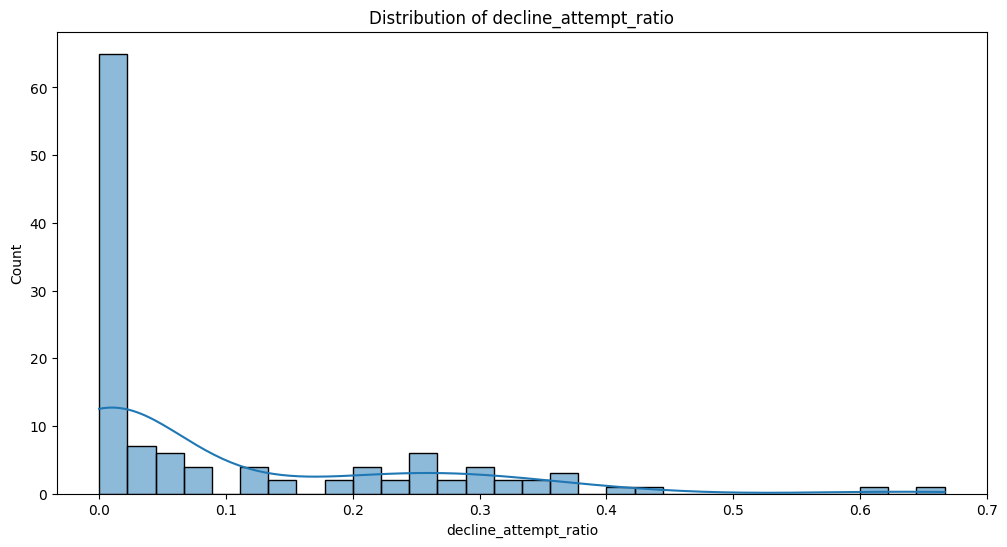

In [ ]:
# prompt: analyse decline_txn and attempt_txn and  create new feature to diffentiatie between default

import matplotlib.pyplot as plt
# Calculate the ratio of decline_txn to attempt_txn
refine_filter['decline_attempt_ratio'] = refine_filter['decline_txn'] / refine_filter['attempt_txn']

# Analyze the new feature for defaulters and non-defaulters separately
defaulters = refine_filter[refine_filter['default_ind'] == 1]
non_defaulters = refine_filter[refine_filter['default_ind'] == 0]

# Calculate and print statistics for decline_attempt_ratio for defaulters
stats_ratio_defaulters = defaulters['decline_attempt_ratio'].describe()
print("\nStatistics for decline_attempt_ratio (Defaulters):")
print(stats_ratio_defaulters)

# Calculate and print statistics for decline_attempt_ratio for non-defaulters
stats_ratio_non_defaulters = non_defaulters['decline_attempt_ratio'].describe()
print("\nStatistics for decline_attempt_ratio (Non-Defaulters):")
print(stats_ratio_non_defaulters)

# Create box plots for decline_attempt_ratio for defaulters and non-defaulters
plt.figure(figsize=(8, 6))
sns.boxplot(x='default_ind', y='decline_attempt_ratio', data=refine_filter)
plt.title('Box Plot of decline_attempt_ratio for Defaulters and Non-Defaulters')
plt.xlabel('Default Indicator')
plt.ylabel('decline_attempt_ratio')
plt.show()

# Create a histogram and kernel density estimation (KDE) plot for decline_attempt_ratio
plt.figure(figsize=(12, 6))
sns.histplot(data=refine_filter, x='decline_attempt_ratio', kde=True, bins=30)
plt.title('Distribution of decline_attempt_ratio')
plt.xlabel('decline_attempt_ratio')
plt.ylabel('Count')
plt.show()



In [ ]:
refine_filter['decline_attmpt_ratio'] = (refine_filter['decline_txn']) / (refine_filter['attempt_txn'] + 1)

<ipython-input-120-bbb420d014ca>:1: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  refine_filter['decline_attmpt_ratio'] = (refine_filter['decline_txn']) / (refine_filter['attempt_txn'] + 1)


In [ ]:
(refine_filter['decline_attempt_ratio'] <=1).sum()

119

In [ ]:
(refine_filter[(refine_filter['default_ind'] == 1)]['decline_attempt_ratio'] <=1).sum()

55

Statistics for debt_cap:

count       145.000000

mean      51201.969430

std       59555.243391

min      -18449.150000

25%       25858.731167

50%       38333.333333

75%       51666.666667

max      454078.116667

Name: debt_cap, dtype: float64


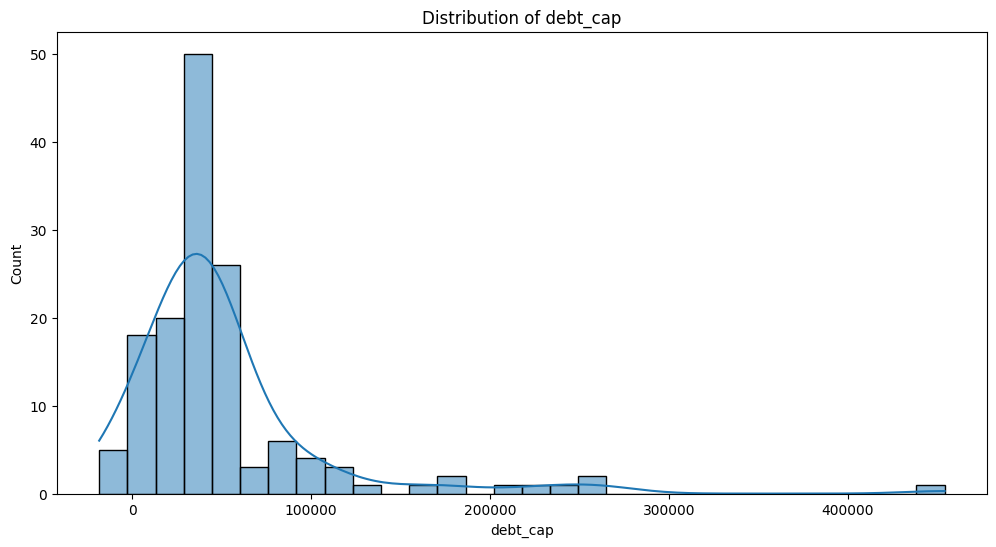



Statistics for debt_cap (Defaulters):

count       64.000000

mean     31900.647396

std      16131.266419

min          0.000000

25%      28333.333333

50%      36520.000000

75%      41370.000000

max      58138.600000

Name: debt_cap, dtype: float64



Statistics for debt_cap (Non-Defaulters):

count        81.000000

mean      66452.396717

std       75138.882026

min      -18449.150000

25%       24124.166667

50%       44780.100000

75%       83097.148000

max      454078.116667

Name: debt_cap, dtype: float64


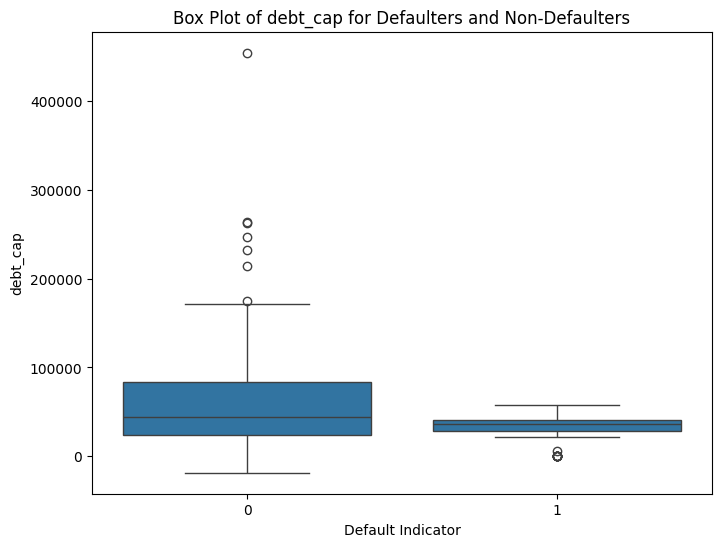

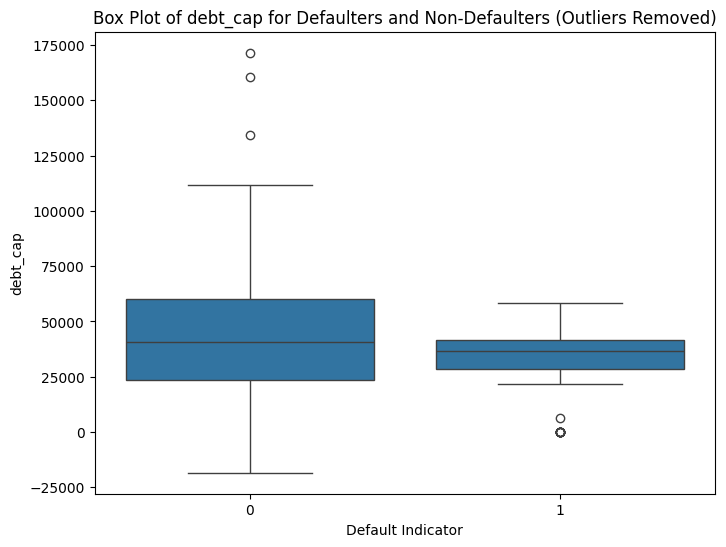

In [ ]:
# prompt: analyse debt_cap to diffentiatie between default.  remove outlier in no-default

import pandas as pd
import matplotlib.pyplot as plt
# Calculate and print some basic statistics
stats = refine_filter['debt_cap'].describe()
print("Statistics for debt_cap:")
print(stats)

# Create a histogram and kernel density estimation (KDE) plot
plt.figure(figsize=(12, 6))
sns.histplot(data=refine_filter, x='debt_cap', kde=True, bins=30)
plt.title('Distribution of debt_cap')
plt.xlabel('debt_cap')
plt.ylabel('Count')
plt.show()

# Analyze the column for defaulters and non-defaulters separately
defaulters = refine_filter[refine_filter['default_ind'] == 1]
non_defaulters = refine_filter[refine_filter['default_ind'] == 0]

# Calculate and print statistics for defaulters
stats_defaulters = defaulters['debt_cap'].describe()
print("\nStatistics for debt_cap (Defaulters):")
print(stats_defaulters)

# Calculate and print statistics for non-defaulters
stats_non_defaulters = non_defaulters['debt_cap'].describe()
print("\nStatistics for debt_cap (Non-Defaulters):")
print(stats_non_defaulters)

# Create box plots for defaulters and non-defaulters
plt.figure(figsize=(8, 6))
sns.boxplot(x='default_ind', y='debt_cap', data=refine_filter)
plt.title('Box Plot of debt_cap for Defaulters and Non-Defaulters')
plt.xlabel('Default Indicator')
plt.ylabel('debt_cap')
plt.show()


# Remove outliers in non-defaulters using IQR
Q1 = non_defaulters['debt_cap'].quantile(0.25)
Q3 = non_defaulters['debt_cap'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
non_defaulters_no_outliers = non_defaulters[(non_defaulters['debt_cap'] >= lower_bound) & (non_defaulters['debt_cap'] <= upper_bound)]

# Combine defaulters and non-defaulters without outliers
refined_data = pd.concat([defaulters, non_defaulters_no_outliers])

# Create box plots for defaulters and non-defaulters without outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='default_ind', y='debt_cap', data=refined_data)
plt.title('Box Plot of debt_cap for Defaulters and Non-Defaulters (Outliers Removed)')
plt.xlabel('Default Indicator')
plt.ylabel('debt_cap')
plt.show()



In [ ]:
(refine_filter[(refine_filter['default_ind'] == 1)]['debt_cap'] <=50000).sum()

60

Accuracy: 1.0


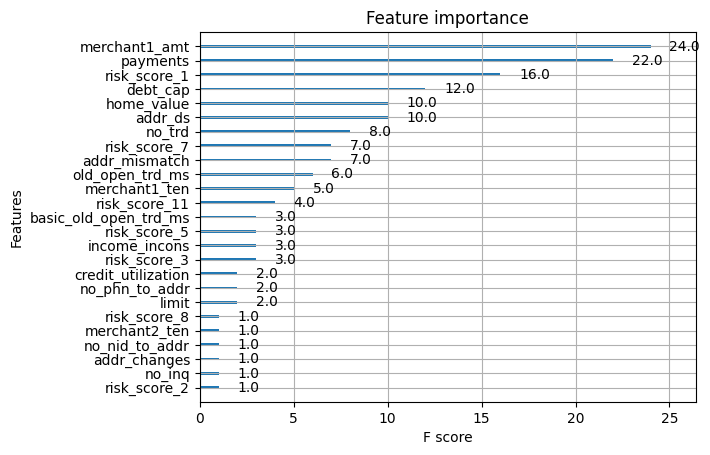

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder # Import label encoder to handle categorical variables

# Separate features and target variable
X = refine_filter.drop(['default_ind', 'appl_month', 'merchant1','unique_identifier'], axis=1)
y = refine_filter['default_ind']

# Encode categorical features
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col]) # Transform object dtype columns to numerical using label encoding

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost classifier
model = xgb.XGBClassifier(enable_categorical=True) # Enable categorical handling in XGBoost
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot feature importance
xgb.plot_importance(model)
plt.show()

In [ ]:
refine_filter

,unique_identifier,appl_month,prod_name,acq_channel,state_code,bureau_src,risk_score_1,bureau_score,limit,income,old_open_trd_ms,no_open_trd,no_trd,debt_cap,basic_max_trd_tnr,basic_no_trd,risk_score_2,trust_identity,risk_score_3,no_inq,risk_score_4,income_incons,bureau_mismatch,risk_score_5,risk_score_6,addr_mismatch,basic_old_open_trd_ms,addr_ds,dl_id,addr_changes,...,uid_nid_matches,home_value,no_addr_to_nid,risk_score_7,no_trd_del,spend,payments,return_payments,attempt_txn,decline_txn,merchant1,merchant1_amt,merchant1_ten,merchant1_cat,merchant2,merchant2_amt,merchant2_ten,merchant2_cat,merchant3,merchant3_amt,merchant3_ten,merchant3_cat,risk_score_8,risk_score_9,risk_score_10,risk_score_11,default_ind,credit_utilization,decline_attempt_ratio,decline_attmpt_ratio
316,105747,Jan,Product 1,Channel 3,TX,No Bureau Hit,0.0,800,25000,110000,0,0,0,48060.333333,0,0,0.00293,Y,107,0,0,0.79333,2,96,29,NaN,0,-1,7,6,...,6,0,9,498,-1,6691.00,3295.0000,0,51,17,102539,3371.86,12,1,168146,832.00,9,1,117377,4.00,12,0,0.010,0.0001,0.052,0.2878,0,7.181759,0.333333,0.326923
510,114290,Feb,Product 7,Channel 1,PA,No Bureau Hit,0.0,650,1000,60000,0,0,0,6170.900000,0,0,0.00240,Y,129,0,0,0.32631,0,99,99,NaN,0,-1,4,6,...,6,0,5,207,-1,253.09,225.0000,0,3,0,134663,90.00,12,1,167706,35.99,12,0,164201,1.10,12,0,0.001,0.0000,0.009,0.2787,0,24.286277,0.000000,0.000000
641,131237,Apr,Product 1,Channel 3,IL,Bureau 2,0.3,800,9100,85000,251,9,25,46186.666667,0,0,0.00320,Y,67,1,0,0.60714,0,55,95,Y,251,4321,0,0,...,4,283148,5,479,22,5032.73,1358.8371,0,14,3,163070,4499.94,11,1,167574,424.79,12,0,137918,108.00,9,1,0.016,0.0006,0.018,0.3218,1,9.175436,0.214286,0.200000
642,131250,Apr,Product 1,Channel 3,NC,Bureau 2,1.3,725,8000,55000,354,1,13,38000.000000,0,0,0.01931,Y,156,0,0,0.20357,0,62,15,Y,354,1026,6,6,...,5,821996,16,463,12,7697.00,2540.0100,0,74,16,163070,5249.93,11,1,167574,1121.46,12,0,164843,863.83,1,1,0.010,0.0006,0.106,0.3218,1,4.936347,0.216216,0.213333
643,131246,Apr,Product 1,Channel 3,NJ,Bureau 2,0.3,800,25000,60000,254,3,13,40000.000000,0,0,0.00970,Y,48,0,0,0.24390,0,55,95,Y,254,9569,-1,0,...,0,176000,8,467,12,7462.00,2238.6000,0,10,3,163070,2249.97,11,1,167574,1455.48,12,0,164843,21.86,1,1,0.009,0.0003,0.132,0.3716,1,5.359775,0.300000,0.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59398,145548,May,Product 1,Channel 1,NC,No Bureau Hit,0.0,725,15000,140000,0,0,0,39334.620000,0,0,0.01278,Y,72,0,0,0.65454,0,96,55,NaN,0,-1,6,1,...,3,0,22,395,-1,0.00,0.0000,0,0,0,0,0.00,0,0,0,0.00,0,0,0,0.00,0,0,0.000,0.0000,0.000,0.2787,0,39334.620000,NaN,0.000000
59416,149438,May,Product 1,Channel 1,NY,No Bureau Hit,0.0,775,20000,85000,0,0,0,40802.008667,0,0,0.00776,Y,36,0,0,0.49722,0,40,19,NaN,0,-1,2,2,...,2,0,19,122,-1,0.00,0.0000,0,0,0,0,0.00,0,0,0,0.00,0,0,0,0.00,0,0,0.000,0.0000,0.000,0.3941,0,40802.008667,NaN,0.000000
59729,134151,Apr,Product 1,Channel 3,SC,Bureau 2,0.2,800,30000,75000,269,4,8,51595.000000,0,0,0.00982,Y,136,0,0,0.42482,0,62,19,N,90,6112,2,6,...,4,460000,4,472,5,0.00,0.0000,0,0,0,0,0.00,0,0,0,0.00,0,0,0,0.00,0,0,0.000,0.0000,0.000,0.3716,0,51595.000000,NaN,0.000000
61012,150964,May,Product 1,Channel 1,CA,No Bureau Hit,0.0,700,16500,500000,0,0,0,246687.336667,0,0,0.00584,Y,68,0,0,1.81818,0,99,99,NaN,0,-1,4,6,...,3,0,20,304,-1,0.00,0.0000,0,0,0,0,0.00,0,0,0,0.00,0,0,0,0.00,0,0,0.000,0.0000,0.000,0.2878,0,246687.336667,NaN,0.000000


In [ ]:
# prompt: drop all columns from refine_filter which contain missing value

data = refine_filter.dropna(axis=1)


In [ ]:
data.shape

(145, 61)

In [ ]:
# prompt: generate visualization for all columns in data

import matplotlib.pyplot as plt
import seaborn as sns
defaulters = data[data['default_ind'] == 1]
non_defaulters = data[data['default_ind'] == 0]
# Iterate over each column in the DataFrame
for column in data.columns:
  # Check the data type of the column
  if data[column].dtype == 'object':
    # Create a countplot for categorical columns
    plt.figure(figsize=(5, 3))
    sns.countplot(x=column, data=defaulters)
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    plt.figure(figsize=(5, 3))
    sns.countplot(x=column, data=non_defaulters)
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=45, ha='right')
    plt.show()
  else:
    # Create a histogram for numerical columns
    plt.figure(figsize=(5, 3))
    sns.histplot(defaulters[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()
    plt.figure(figsize=(5, 3))
    sns.histplot(non_defaulters[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
defaulters = data[data['default_ind'] == 1]
non_defaulters = data[data['default_ind'] == 0]

In [ ]:
q = refine_filter[refine_filter['default_ind'] == 1]
ratio = refine_filter['payments']/refine_filter['spend']
ratio.max()

140.0

In [ ]:
refine_filter[(refine_filter['payments']/refine_filter['spend'] < 140) & (refine_filter['default_ind'] == 1)].shape

(55, 61)

In [ ]:
refine_filter[refine_filter['payments']/refine_filter['spend'] < 0.6].shape

(76, 61)

In [ ]:
non_defaulters.shape

(81, 61)

In [ ]:
((non_defaulters['no_inq'] ==0 ) & (non_defaulters['risk_score_1'] == 0)).sum()

64

In [ ]:
((defaulters['no_inq'] ==  0)&(defaulters['risk_score_1'] ==0 )).sum()

0

In [ ]:
mean = df['risk_score_7'].mean()
std = df['risk_score_7'].std()

In [ ]:
filter = refine_filter[ (refine_filter['risk_score_1'] !=0)& (refine_filter['prod_name'] == 'Product 1') ]
filter.shape

(76, 61)

In [ ]:
mean = df['income'].mean()
std = df['income'].std()

In [ ]:
refine_filter.shape

(145, 61)

In [ ]:
refine_filter[ (refine_filter['limit'] > 3999) ].shape

(131, 61)

In [ ]:
((non_defaulters['limit'] < 4000 ) ).sum()

8

In [ ]:
(defaulters['limit'] < 4000 ).sum()

1

In [ ]:
inq_df = refine_filter[refine_filter['no_inq'] == 0]

In [ ]:
inq_df.shape

(116, 64)

In [ ]:
risk_scores = ['risk_score_{}'.format(i) for i in range(1,12)]

In [ ]:
# prompt: plot scatter plot of risk_scores in inq_df data

import matplotlib.pyplot as plt
# Create scatter plots for different risk scores
for i in range(len(risk_scores)):
  for j in range(i + 1, len(risk_scores)):
    plt.figure(figsize=(8, 6))
    plt.scatter(refine_filter[risk_scores[i]], refine_filter[risk_scores[j]], c=refine_filter['default_ind'], cmap='viridis')
    plt.title(f'Scatter Plot of {risk_scores[i]} vs. {risk_scores[j]}')
    plt.xlabel(risk_scores[i])
    plt.ylabel(risk_scores[j])
    plt.colorbar(label='Default Indicator')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

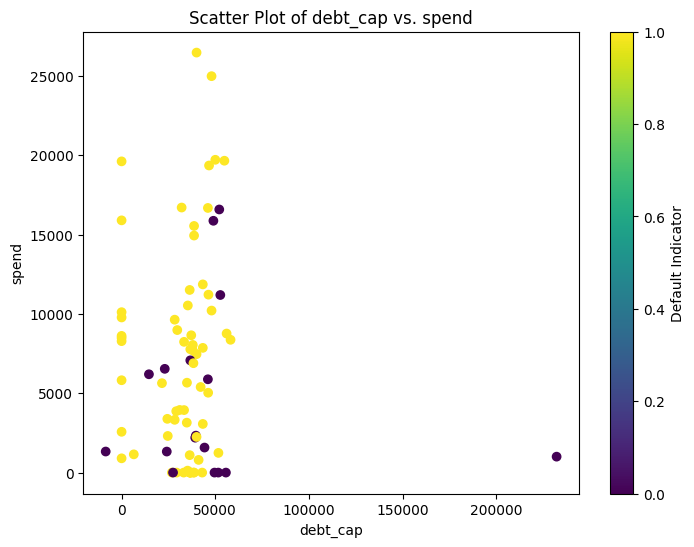

In [ ]:
# prompt: make a scatter plot of debt_cap and spend  of refine_filter

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(refine_filter['debt_cap'], refine_filter['spend'], c=refine_filter['default_ind'], cmap='viridis')
plt.title('Scatter Plot of debt_cap vs. spend')
plt.xlabel('debt_cap')
plt.ylabel('spend')
plt.colorbar(label='Default Indicator')
plt.show()


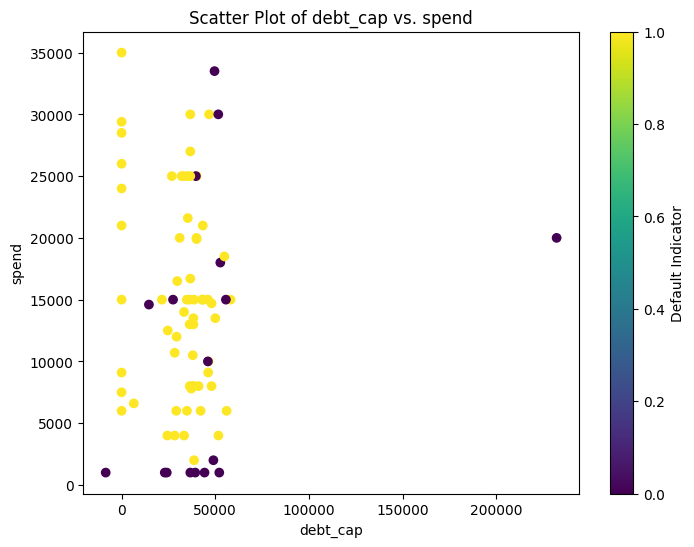

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(refine_filter['debt_cap'], refine_filter['limit'], c=refine_filter['default_ind'], cmap='viridis')
plt.title('Scatter Plot of debt_cap vs. spend')
plt.xlabel('debt_cap')
plt.ylabel('spend')
plt.colorbar(label='Default Indicator')
plt.show()

In [ ]:
refine_filter = refine_filter[refine_filter['debt_cap'] < 8000000]

In [ ]:
filter.shape

(81, 61)

In [ ]:
defaulter = filter[filter['default_ind'] == 1]
non_defaulter = filter[filter['default_ind'] == 0]

In [ ]:
defaulter['merchant1_ten'].value_counts()

,count
merchant1_ten,
11,34
0,9
2,7
12,6
3,3
1,3
8,1
5,1


In [ ]:
# prompt: plot month- wise for defaulters  and non defaulter each column in filter dataframe

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'filter' is your DataFrame and 'appl_month' is the month column
defaulters = filter[filter['default_ind'] == 1]
non_defaulters = filter[filter['default_ind'] == 0]

for column in filter.columns:
  if column != 'appl_month' and column != 'default_ind':
    plt.figure(figsize=(12, 6))
    sns.countplot(x='appl_month', hue=column, data=defaulters)
    plt.title(f'{column} Trend for Defaulters')
    plt.xlabel('Application Month')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title=column)
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.countplot(x='appl_month', hue=column, data=non_defaulters)
    plt.title(f'{column} Trend for Non-Defaulters')
    plt.xlabel('Application Month')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title=column)
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
defaulter.describe()

,unique_identifier,risk_score_1,bureau_score,limit,income,old_open_trd_ms,no_open_trd,no_trd,debt_cap,basic_max_trd_tnr,basic_no_trd,risk_score_2,risk_score_3,no_inq,risk_score_4,income_incons,bureau_mismatch,risk_score_5,risk_score_6,basic_old_open_trd_ms,addr_ds,dl_id,addr_changes,no_phn_to_addr,no_nid_to_addr,no_uid_to_addr,uid_addr_matches,uid_nid_matches,home_value,no_addr_to_nid,risk_score_7,no_trd_del,spend,payments,return_payments,attempt_txn,decline_txn,merchant1,merchant1_amt,merchant1_ten,merchant1_cat,merchant2,merchant2_amt,merchant2_ten,merchant2_cat,merchant3,merchant3_amt,merchant3_ten,merchant3_cat,risk_score_8,risk_score_9,risk_score_10,risk_score_11,default_ind
count,64.000000,64.000000,64.00000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.0,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,6.400000e+01,64.00000,64.000000,64.000000,64.000000,64.000000,64.0,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.00000,64.000000,64.000000,64.000000,64.000000,64.000000,64.0
mean,131241.500000,0.871875,800.00000,15165.625000,62109.375000,265.515625,4.781250,11.156250,31900.647396,26.953125,1.312500,0.016083,106.718750,0.500000,0.0,0.334789,0.125000,58.406250,35.140625,204.625000,6336.468750,2.562500,3.765625,4.718750,8.671875,10.328125,6.187500,3.625000,2.521674e+05,8.46875,459.812500,8.765625,7393.023594,832.922186,0.0,13.984375,2.515625,139097.687500,4709.616250,7.578125,0.515625,78501.000000,984.472500,4.625000,0.406250,71097.234375,363.399375,3.59375,0.265625,0.034906,0.001147,0.059516,0.381734,1.0
std,7431.291558,1.006719,54.37232,8002.642793,9503.745607,154.641520,3.868755,8.576858,16131.266419,81.224445,4.264564,0.016128,54.812659,0.642416,0.0,0.126489,0.454257,14.936605,31.976116,131.652079,3769.077265,2.736438,2.758779,4.762515,6.050199,7.326955,4.208363,2.615582,2.274092e+05,5.63709,21.195893,7.347912,6590.646922,947.815933,0.0,20.700811,3.482346,57494.079438,3999.209036,4.796840,0.503706,82010.028063,1497.676478,5.519087,0.495015,81711.859225,672.467185,5.34439,0.445157,0.127321,0.002575,0.094814,0.064407,0.0
min,120807.000000,0.100000,675.00000,2000.000000,50000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.0,0.026000,0.000000,10.000000,0.000000,-1.000000,115.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.00000,324.000000,-1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.278700,1.0
25%,128625.000000,0.300000,775.00000,8000.000000,55000.000000,184.250000,2.000000,5.000000,28333.333333,0.000000,0.000000,0.002855,50.500000,0.000000,0.0,0.285530,0.000000,55.000000,19.000000,139.750000,2826.500000,0.000000,0.000000,2.000000,4.750000,5.000000,0.750000,0.000000,0.000000e+00,5.00000,452.000000,3.000000,1996.250000,0.000000,0.0,2.750000,0.000000,163070.000000,1811.420000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.010750,0.321800,1.0
50%,131241.500000,0.600000,800.00000,15000.000000,60000.000000,290.500000,4.000000,10.500000,36520.000000,0.000000,0.000000,0.012135,108.500000,0.000000,0.0,0.325000,0.000000,62.000000,19.000000,212.000000,6909.500000,2.000000,6.000000,3.000000,7.000000,9.000000,8.000000,5.000000,2.576730e+05,6.00000,460.500000,7.000000,7178.000000,735.080000,0.0,9.500000,1.000000,163070.000000,4212.805000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.002000,0.000100,0.034500,0.371600,1.0
75%,133858.000000,1.050000,800.00000,21000.000000,70000.000000,376.500000,7.000000,15.000000,41370.000000,0.000000,0.000000,0.022417,158.750000,1.000000,0.0,0.362187,0.000000,

In [ ]:
non_defaulter

,unique_identifier,appl_month,prod_name,acq_channel,state_code,bureau_src,risk_score_1,bureau_score,limit,income,old_open_trd_ms,no_open_trd,no_trd,debt_cap,basic_max_trd_tnr,basic_no_trd,risk_score_2,trust_identity,risk_score_3,no_inq,risk_score_4,income_incons,bureau_mismatch,risk_score_5,risk_score_6,addr_mismatch,basic_old_open_trd_ms,addr_ds,dl_id,addr_changes,...,no_nid_to_addr,no_uid_to_addr,uid_addr_matches,uid_nid_matches,home_value,no_addr_to_nid,risk_score_7,no_trd_del,spend,payments,return_payments,attempt_txn,decline_txn,merchant1,merchant1_amt,merchant1_ten,merchant1_cat,merchant2,merchant2_amt,merchant2_ten,merchant2_cat,merchant3,merchant3_amt,merchant3_ten,merchant3_cat,risk_score_8,risk_score_9,risk_score_10,risk_score_11,default_ind
942,105068,Jan,Product 11,Channel 2,NV,Bureau 2,4.9,675,1000,30000,16,2,2,23033.666667,0,0,0.01399,Y,72,0,0,0.36466,0,69,29,Y,16,13084,0,0,...,10,12,13,7,239201,3,415,1,6538.00,966.0,0,18,0,167079,1082.50,6,0,167078,54.71,6,0,156516,40.84,12,0,0.184,0.0154,0.066,0.4985,0
1718,132840,Apr,Product 1,Channel 3,NC,Bureau 2,0.6,800,18000,75000,284,1,12,52677.500000,0,0,0.01541,Y,115,0,0,0.34090,0,27,18,N,284,2891,6,6,...,6,9,7,5,0,7,473,11,11190.90,5152.0,0,5,1,166594,4092.60,12,0,166608,1946.30,11,0,0,0.00,0,0,0.000,0.0000,0.138,0.4551,0
6937,132397,Apr,Product 1,Channel 3,MA,Bureau 2,3.0,750,1000,70000,604,5,11,52117.833333,0,0,0.03806,Y,141,0,0,0.48333,0,27,19,N,604,7746,7,6,...,5,6,10,6,547568,8,478,10,16581.00,10767.0,0,39,0,117372,6000.00,12,1,160745,1412.12,12,0,130171,775.12,7,0,0.034,0.0005,0.027,0.3218,0
10090,135359,Apr,Product 1,Channel 3,VA,Bureau 2,1.0,800,2000,70000,392,6,12,48983.666667,0,0,0.02149,Y,27,0,0,0.28000,0,27,19,N,206,4785,4,6,...,7,7,6,5,262563,8,473,10,15868.00,13983.0,0,166,6,100978,1787.60,12,0,156589,1227.97,12,0,109979,600.00,12,1,0.005,0.0000,0.000,0.3716,0
16295,132015,Apr,Product 1,Channel 3,NC,Bureau 2,7.2,900,1000,60000,134,0,1,44249.100000,0,0,0.06996,Y,115,0,0,0.31500,0,65,15,Y,134,5994,7,5,...,0,0,4,5,14908000,0,464,0,1577.00,1264.0,0,27,3,106558,257.95,12,0,148157,197.75,12,1,106398,162.50,12,0,0.000,0.0000,0.024,0.3941,0
21956,131880,Apr,Product 6,Channel 1,OR,Bureau 1,4.6,700,1000,60000,217,10,32,-8481.258533,217,25,0.00055,NaN,27,0,0,0.38402,0,0,0,N,217,3425,-1,-1,...,-1,-1,-1,-1,335441,-1,0,30,1327.00,1536.0,0,9,0,123277,152.97,12,0,137708,113.92,0,1,110123,62.16,12,0,0.122,0.0005,0.043,0.1332,0
23117,132013,Apr,Product 1,Channel 3,MD,Bureau 2,0.4,775,14600,55000,275,9,24,14589.000000,0,0,0.01143,Y,30,1,0,0.24576,0,62,19,N,275,420,6,2,...,14,15,6,5,475000,16,438,21,6196.00,4394.0,0,34,1,111728,400.00,12,0,135065,342.00,12,1,147975,114.10,12,1,0.001,0.0000,0.478,0.3716,0
34440,133832,Apr,Product 1,Channel 3,FL,Bureau 2,0.4,800,25000,55000,450,3,6,39627.533333,0,0,0.05822,Y,127,0,0,0.35151,0,24,19,N,216,4170,7,6,...,7,7,8,6,348811,8,476,5,2328.00,4000.0,0,30,1,107433,391.19,12,1,116259,174.00,12,1,167513,169.00,4,1,0.019,0.0026,0.070,0.4551,0
40625,129951,Mar,Product 4,Channel 3,ME,No Bureau Hit,0.7,775,20000,320000,207,3,12,232114.166667,207,8,0.00159,Y,64,0,0,2.32142,2,76,0,N,207,3356,7,6,...,0,0,8,6,0,0,466,11,1003.53,64.0,0,17,0,166058,400.00,12,0,106377,364.53,11,1,108713,175.00,6,1,0.003,0.0003,0.089,0.1175,0
40772,132551,Apr,Product 1,Channel 3,OH,Bureau 2,2.7,725,1000,55000,239,8,29,39288.333333,0,0,0.05085,Y,142,2,0,0.23913,0,27,19,N,215,7229,7,6,...,7,13,11,6,225086,10,480,25,2199.00,2206.0,0,4,1,141682,90.32,12,0,106195,48.80,12,0,0,0.00,0,0,0.000,0.0000,0.041,0.3716,0


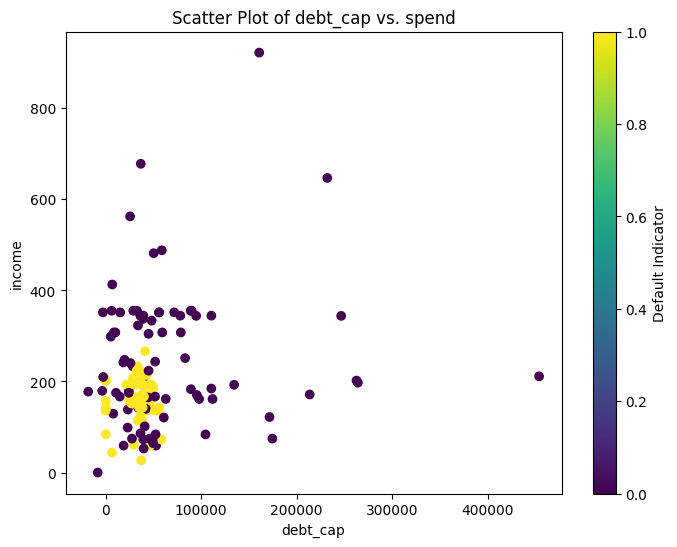

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(filter['debt_cap'], filter['spend']/filter['limit'], c=filter['default_ind'], cmap='viridis')
plt.title('Scatter Plot of debt_cap vs. spend')
plt.xlabel('debt_cap')
plt.ylabel('income')
plt.colorbar(label='Default Indicator')
plt.show()

In [ ]:
defaulters.describe()

,unique_identifier,risk_score_1,bureau_score,limit,income,old_open_trd_ms,no_open_trd,no_trd,debt_cap,basic_max_trd_tnr,basic_no_trd,risk_score_2,risk_score_3,no_inq,risk_score_4,income_incons,bureau_mismatch,risk_score_5,risk_score_6,basic_old_open_trd_ms,addr_ds,dl_id,addr_changes,no_phn_to_addr,no_nid_to_addr,no_uid_to_addr,uid_addr_matches,uid_nid_matches,home_value,no_addr_to_nid,risk_score_7,no_trd_del,spend,payments,return_payments,attempt_txn,decline_txn,merchant1,merchant1_amt,merchant1_ten,merchant1_cat,merchant2,merchant2_amt,merchant2_ten,merchant2_cat,merchant3,merchant3_amt,merchant3_ten,merchant3_cat,risk_score_8,risk_score_9,risk_score_10,risk_score_11,default_ind,credit_utilization,decline_attmpt_ratio
count,64.000000,64.000000,64.00000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.0,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,6.400000e+01,64.00000,64.000000,64.000000,64.000000,64.000000,64.0,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.00000,64.000000,64.000000,64.000000,64.000000,64.000000,64.0,64.000000,64.000000
mean,131241.500000,0.871875,800.00000,15165.625000,62109.375000,265.515625,4.781250,11.156250,31900.647396,26.953125,1.312500,0.016083,106.718750,0.500000,0.0,0.334789,0.125000,58.406250,35.140625,204.625000,6336.468750,2.562500,3.765625,4.718750,8.671875,10.328125,6.187500,3.625000,2.521674e+05,8.46875,459.812500,8.765625,7393.023594,832.922186,0.0,13.984375,2.515625,139097.687500,4709.616250,7.578125,0.515625,78501.000000,984.472500,4.625000,0.406250,71097.234375,363.399375,3.59375,0.265625,0.034906,0.001147,0.059516,0.381734,1.0,5251.029885,0.122153
std,7431.291558,1.006719,54.37232,8002.642793,9503.745607,154.641520,3.868755,8.576858,16131.266419,81.224445,4.264564,0.016128,54.812659,0.642416,0.0,0.126489,0.454257,14.936605,31.976116,131.652079,3769.077265,2.736438,2.758779,4.762515,6.050199,7.326955,4.208363,2.615582,2.274092e+05,5.63709,21.195893,7.347912,6590.646922,947.815933,0.0,20.700811,3.482346,57494.079438,3999.209036,4.796840,0.503706,82010.028063,1497.676478,5.519087,0.495015,81711.859225,672.467185,5.34439,0.445157,0.127321,0.002575,0.094814,0.064407,0.0,12553.561544,0.135689
min,120807.000000,0.100000,675.00000,2000.000000,50000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.0,0.026000,0.000000,10.000000,0.000000,-1.000000,115.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.00000,324.000000,-1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.278700,1.0,0.000000,0.000000
25%,128625.000000,0.300000,775.00000,8000.000000,55000.000000,184.250000,2.000000,5.000000,28333.333333,0.000000,0.000000,0.002855,50.500000,0.000000,0.0,0.285530,0.000000,55.000000,19.000000,139.750000,2826.500000,0.000000,0.000000,2.000000,4.750000,5.000000,0.750000,0.000000,0.000000e+00,5.00000,452.000000,3.000000,1996.250000,0.000000,0.0,2.750000,0.000000,163070.000000,1811.420000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.010750,0.321800,1.0,2.575457,0.000000
50%,131241.500000,0.600000,800.00000,15000.000000,60000.000000,290.500000,4.000000,10.500000,36520.000000,0.000000,0.000000,0.012135,108.500000,0.000000,0.0,0.325000,0.000000,62.000000,19.000000,212.000000,6909.500000,2.000000,6.000000,3.000000,7.000000,9.000000,8.000000,5.000000,2.576730e+05,6.00000,460.500000,7.000000,7178.000000,735.080000,0.0,9.500000,1.000000,163070.000000,4212.805000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.002000,0.000100,0.034500,0.371600,1.0,5.148061,0.066964
75%,133858.000000,

In [ ]:
non_defaulters.describe()

,unique_identifier,risk_score_1,bureau_score,limit,income,old_open_trd_ms,no_open_trd,no_trd,debt_cap,basic_max_trd_tnr,basic_no_trd,risk_score_2,risk_score_3,no_inq,risk_score_4,income_incons,bureau_mismatch,risk_score_5,risk_score_6,basic_old_open_trd_ms,addr_ds,dl_id,addr_changes,no_phn_to_addr,no_nid_to_addr,no_uid_to_addr,uid_addr_matches,uid_nid_matches,home_value,no_addr_to_nid,risk_score_7,no_trd_del,spend,payments,return_payments,attempt_txn,decline_txn,merchant1,merchant1_amt,merchant1_ten,merchant1_cat,merchant2,merchant2_amt,merchant2_ten,merchant2_cat,merchant3,merchant3_amt,merchant3_ten,merchant3_cat,risk_score_8,risk_score_9,risk_score_10,risk_score_11,default_ind,credit_utilization,decline_attmpt_ratio
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.0,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,8.100000e+01,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.0,81.000000,81.000000
mean,130711.234568,0.464198,760.802469,12680.246914,136604.938272,67.777778,0.975309,2.555556,66452.396717,15.555556,0.481481,0.009754,62.481481,0.037037,0.0,0.672446,0.246914,66.950617,52.518519,52.851852,1389.382716,4.000000,4.604938,12.172840,12.123457,15.061728,6.234568,4.456790,2.576846e+05,13.962963,329.123457,1.345679,8288.378272,6796.604938,177.382716,43.172840,1.432099,106130.802469,1827.553457,8.876543,0.283951,89093.975309,390.317901,7.345679,0.222222,77960.345679,201.079506,6.716049,0.259259,0.029136,0.001515,0.049444,0.313615,0.0,20605.241630,0.030873
std,17095.516979,1.425509,50.301943,9089.271420,138597.499888,152.632647,2.339740,6.542171,75138.882026,73.016608,2.950047,0.012643,49.173192,0.247207,0.0,0.648072,0.536909,27.222188,36.327025,122.548573,3170.325238,2.318405,1.908396,22.745214,18.565683,24.913022,2.744411,1.581529,1.664588e+06,28.676839,127.435413,6.019054,16820.635405,16636.610793,1596.444444,65.932881,3.368747,58363.660490,6332.772135,5.018423,0.453723,65886.060429,640.037988,5.677060,0.418330,65306.780279,299.395193,5.705775,0.440959,0.116831,0.008958,0.074909,0.104474,0.0,64997.524590,0.087759
min,101594.000000,0.000000,650.000000,1000.000000,20000.000000,0.000000,0.000000,0.000000,-18449.150000,0.000000,0.000000,0.000190,22.000000,0.000000,0.0,0.096150,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000e+00,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.097800,0.0,-3037.289500,0.000000
25%,120060.000000,0.000000,725.000000,6000.000000,60000.000000,0.000000,0.000000,0.000000,24124.166667,0.000000,0.000000,0.003230,29.000000,0.000000,0.0,0.292900,0.000000,50.000000,19.000000,0.000000,-1.000000,2.000000,3.000000,3.000000,5.000000,6.000000,4.000000,3.000000,0.000000e+00,5.000000,207.000000,-1.000000,253.090000,0.000000,0.000000,1.000000,0.000000,101138.000000,57.650000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.278700,0.0,4.060538,0.000000
50%,132015.000000,0.000000,775.000000,10000.000000,85000.000000,0.000000,0.000000,0.000000,44780.100000,0.000000,0.000000,0.005210,42.000000,0.000000,0.0,0.452320,0.000000,68.000000,39.000000,0.000000,-1.000000,4.000000,6.000000,5.000000,8.000000,12.000000,6.000000,5.000000,0.000000e+00,9.000000,362.000000,-1.000000,2424.400000,2040.000000,0.000000,10.000000,0.000000,125518.000000,428.530000,12.000000,0.000000,110477.000000,174.000000,12.000000,0.000000,108713.000000,58.840000,11.000000,0.00000

In [ ]:
df.describe()

,unique_identifier,risk_score_1,bureau_score,limit,income,old_open_trd_ms,no_open_trd,no_trd,debt_cap,basic_max_trd_tnr,basic_no_trd,risk_score_2,risk_score_3,no_inq,risk_score_4,income_incons,bureau_mismatch,risk_score_5,risk_score_6,basic_old_open_trd_ms,addr_ds,dl_id,addr_changes,no_phn_to_addr,no_nid_to_addr,no_uid_to_addr,uid_addr_matches,uid_nid_matches,home_value,no_addr_to_nid,risk_score_7,no_trd_del,spend,payments,return_payments,attempt_txn,decline_txn,merchant1,merchant1_amt,merchant1_ten,merchant1_cat,merchant2,merchant2_amt,merchant2_ten,merchant2_cat,merchant3,merchant3_amt,merchant3_ten,merchant3_cat,risk_score_8,risk_score_9,risk_score_10,risk_score_11,default_ind
count,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,6.248400e+04,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.00000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.00000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,6.248400e+04,62484.000000,62484.000000,62484.000000,6.248400e+04,6.248400e+04,62484.000000,62484.000000,62484.000000,62484.000000,62484.00000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.00000,62484.000000,62484.000000,62484.000000
mean,131242.500000,1.890106,772.460550,10731.355227,127925.981051,104.247503,3.834086,7.944882,1.041317e+05,77.085558,5.779143,0.006798,5.123376,0.527479,116.54702,0.874368,0.216199,77.479179,56.840503,81.525863,1805.925741,0.98302,1.130017,13.869375,14.442657,18.253393,1.729131,0.900967,4.635994e+05,13.848697,271.847129,6.000288,8.783199e+03,7.811301e+03,64.068706,44.625136,2.178702,111402.588071,1506.58314,9.190625,0.245375,98102.450915,496.924911,8.232780,0.225162,90130.369647,300.165050,7.601146,0.219992,0.053128,0.00312,0.048355,0.202346,0.005809
std,18037.721447,3.294003,71.644113,10303.905843,134003.357926,138.466501,5.519016,11.758840,1.209267e+06,119.646339,9.804006,0.015567,33.054268,1.132909,208.90175,8.711944,0.488040,21.204451,35.640326,120.476583,2936.163837,2.71305,2.644120,31.478085,37.462158,45.337470,3.531859,2.528575,4.646196e+06,42.372829,119.088868,10.863290,2.156894e+04,2.049505e+04,1131.737486,73.930590,18.638315,57284.246270,3816.49743,4.953860,0.430313,63544.014824,1161.662260,5.642287,0.417692,66263.258748,670.473955,5.957123,0.414244,0.166323,0.02954,0.072672,0.066089,0.075999
min,100001.000000,0.000000,525.000000,500.000000,1000.000000,0.000000,0.000000,0.000000,-8.138950e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000e+00,-1.000000,0.000000,-1.000000,0.000000e+00,-7.406900e+04,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.054400,0.000000
25%,115621.750000,0.000000,725.000000,2000.000000,55000.000000,0.000000,0.000000,0.000000,2.651645e+04,0.000000,0.000000,0.000490,0.000000,0.000000,3.00000,0.303553,0.000000,68.000000,19.000000,0.000000,0.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000e+00,-1.000000,181.000000,-1.000000,3.750000e+02,9.500000e+01,0.000000,2.000000,0.000000,104269.000000,86.36750,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.159200,0.000000
50%,131242.500000,0.200000,775.000000,6000.000000,90000.000000,20.000000,1.000000,2.000000,4.831467e+04,0.000000,0.000000,0.001750,1.000000,0.000000,12.00000,0.500000,0.000000,78.000000,75.000000,3.000000,336.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000e+00,-1.000000,257.000000,0.000000,2.976000e+03,2.085000e+03,0.000000,14.000000,0.000000,129568.500000,524.34000,12.000000,0.000000,12303

In [ ]:
((df['prod_name'] == 'Product 1')& (df['acq_channel'] == 'Channel 3')).sum()

6825

In [ ]:
city = defaulters['state_code'].unique()

In [ ]:
df[(df['prod_name'] == 'Product 1') & (df['acq_channel'] == 'Channel 3') & (df['risk_score_1'] !=0) & (df['risk_score_4']==0)  ]

,unique_identifier,appl_month,prod_name,acq_channel,state_code,bureau_src,risk_score_1,bureau_score,limit,income,old_open_trd_ms,no_open_trd,no_trd,debt_cap,basic_max_trd_tnr,basic_no_trd,risk_score_2,trust_identity,risk_score_3,no_inq,risk_score_4,income_incons,bureau_mismatch,risk_score_5,risk_score_6,addr_mismatch,basic_old_open_trd_ms,addr_ds,dl_id,addr_changes,...,no_nid_to_addr,no_uid_to_addr,uid_addr_matches,uid_nid_matches,home_value,no_addr_to_nid,risk_score_7,no_trd_del,spend,payments,return_payments,attempt_txn,decline_txn,merchant1,merchant1_amt,merchant1_ten,merchant1_cat,merchant2,merchant2_amt,merchant2_ten,merchant2_cat,merchant3,merchant3_amt,merchant3_ten,merchant3_cat,risk_score_8,risk_score_9,risk_score_10,risk_score_11,default_ind
421,161853,Jun,Product 1,Channel 3,CA,Bureau 1,0.2,775,15000,60000,486,4,7,33590.000000,235,4,0.00109,NaN,1,0,0,0.40000,1,72,95,N,235,9725,-1,-1,...,-1,-1,-1,-1,210000,-1,363,4,103725.00,100591.0000,0,326,21,153673,5534.62,12,0,167852,4983.05,12,0,163920,4542.39,0,0,0.000,0.0000,0.033,0.1592,0
585,153090,Jun,Product 1,Channel 3,AR,Bureau 1,6.8,700,1000,20000,239,2,8,6670.370000,123,4,0.00632,Y,16,1,0,1.00000,0,99,99,N,123,9993,4,6,...,8,9,10,7,0,9,421,5,1315.00,1287.0000,0,13,0,164201,299.60,12,0,167620,44.81,12,0,121540,29.97,12,1,0.189,0.0006,0.118,0.3218,0
641,131237,Apr,Product 1,Channel 3,IL,Bureau 2,0.3,800,9100,85000,251,9,25,46186.666667,0,0,0.00320,Y,67,1,0,0.60714,0,55,95,Y,251,4321,0,0,...,11,10,8,4,283148,5,479,22,5032.73,1358.8371,0,14,3,163070,4499.94,11,1,167574,424.79,12,0,137918,108.00,9,1,0.016,0.0006,0.018,0.3218,1
642,131250,Apr,Product 1,Channel 3,NC,Bureau 2,1.3,725,8000,55000,354,1,13,38000.000000,0,0,0.01931,Y,156,0,0,0.20357,0,62,15,Y,354,1026,6,6,...,22,22,5,5,821996,16,463,12,7697.00,2540.0100,0,74,16,163070,5249.93,11,1,167574,1121.46,12,0,164843,863.83,1,1,0.010,0.0006,0.106,0.3218,1
643,131246,Apr,Product 1,Channel 3,NJ,Bureau 2,0.3,800,25000,60000,254,3,13,40000.000000,0,0,0.00970,Y,48,0,0,0.24390,0,55,95,Y,254,9569,-1,0,...,6,9,0,0,176000,8,467,12,7462.00,2238.6000,0,10,3,163070,2249.97,11,1,167574,1455.48,12,0,164843,21.86,1,1,0.009,0.0003,0.132,0.3716,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61316,135993,Apr,Product 1,Channel 3,ME,Bureau 1,0.6,775,15000,70000,373,3,9,83040.333333,0,0,0.00440,Y,4,0,0,1.00000,0,96,29,N,-1,35,4,6,...,13,14,10,6,42624,14,224,6,0.00,0.0000,0,0,0,0,0.00,0,0,0,0.00,0,0,0,0.00,0,0,0.000,0.0000,0.000,0.2035,0
61540,110028,Jan,Product 1,Channel 3,MN,Bureau 1,4.0,750,1000,40000,72,5,6,25380.000000,72,6,0.00394,Y,3,1,0,0.28571,1,0,73,N,72,307,6,1,...,206,255,4,3,0,20,428,3,0.00,0.0000,0,0,0,0,0.00,0,0,0,0.00,0,0,0,0.00,0,0,0.000,0.0000,0.000,0.1592,0
62198,151578,May,Product 1,Channel 3,FL,Bureau 1,4.8,725,1000,40000,258,5,8,22736.000000,258,8,0.00173,Y,8,0,0,0.22857,0,76,28,N,258,1104,7,3,...,0,0,5,7,212095,0,450,7,0.00,0.0000,0,0,0,0,0.00,0,0,0,0.00,0,0,0,0.00,0,0,0.000,0.0000,0.000,0.1662,0
62357,132708,Apr,Product 1,Channel 3,NY,Bureau 1,0.1,800,30000,130000,431,16,36,61028.333333,431,29,0.00037,NaN,1,1,0,0.31416,0,99,95,N,431,9483,-1,-1,...,-1,-1,-1,-1,798479,-1,17,33,980.00,364.0000,0,6,0,160716,300.00,24,0,0,0.00,0,0,129141,125.00,12,0,0.000,0.0000,0.022,0.2229,0


In [ ]:
# prompt: df.trust_identity.value_counts(

df.trust_identity.value_counts()


,count
trust_identity,
Y,18987
N,13393
